<a href="https://colab.research.google.com/github/jgalbers12/NBA-Positions-Project/blob/main/NBA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Retrieval

In [ ]:
import pandas as pd
import numpy as np

There are 4 different files that I'm going to load in from the dataset from Kaggle. https://www.kaggle.com/datasets/nicklauskim/nba-per-game-stats-201920. One is for per 36 min stats, one is for shooting stats, one is for advanced stats, and the last is for per possession stats.

In [ ]:
p36_df = pd.read_csv("https://raw.githubusercontent.com/jgalbers12/nba2017-18/main/nba_2020_per_minute.csv") # per 36 minute data
shooting_df = pd.read_csv("https://raw.githubusercontent.com/jgalbers12/nba2017-18/main/nba_2020_shooting.csv") # shooting stats data
adv_df = pd.read_csv("https://raw.githubusercontent.com/jgalbers12/nba2017-18/main/nba_2020_advanced.csv") # advanced stats data
poss_df = pd.read_csv("https://raw.githubusercontent.com/jgalbers12/nba2017-18/main/nba_2020_per_poss.csv") # per possession data

In [ ]:
poss_df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
count,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,649.000000,651.000000,651.000000,616.000000,...,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,649.000000,651.000000
mean,25.763441,38.21659,17.537634,864.158218,7.108295,16.145622,0.442891,2.093088,6.373118,0.313438,...,6.814286,9.003687,4.204762,1.542243,1.003379,2.662826,4.627650,19.319508,106.486903,110.981567
std,4.024840,22.94443,23.022124,707.915007,2.708367,5.260096,0.111526,1.487010,3.739564,0.133521,...,3.204544,4.642611,2.744257,1.038230,0.972050,1.423160,1.919648,7.163523,17.739722,4.525106
min,19.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000
25%,23.000000,15.50000,0.000000,221.000000,5.400000,12.600000,0.399000,1.000000,4.000000,0.270750,...,4.800000,5.800000,2.400000,1.000000,0.400000,1.800000,3.500000,14.800000,100.000000,108.000000
50%,25.000000,41.00000,4.000000,734.000000,6.800000,15.800000,0.439000,2.100000,6.400000,0.339000,...,6.300000,8.000000,3.400000,1.400000,0.700000,2.500000,4.300000,18.600000,109.000000,111.000000
75%,28.000000,59.00000,29.500000,1435.500000,8.600000,19.200000,0.486000,3.100000,8.800000,0.378250,...,8.400000,11.150000,5.500000,1.950000,1.300000,3.300000,5.500000,23.550000,116.000000,114.000000
max,43.000000,74.00000,73.000000,2556.000000,16.300000,47.800000,1.000000,9.300000,19.800000,1.000000,...,32.400000,47.800000,23.700000,16.200000,6.500000,12.700000,16.900000,44.200000,173.000000,123.000000


# Merging Data

I'm deciding to use the per possession stats, the advanced stats, and the shooting stats in one dataframe. I'm choosing the per possession stats because these account for differences in pace of play (number of possessions per unit of time). Whereas per 36 stats scale based on the amount of time each player is on the court. These are both better than per game stats since some players play a lot more time and possessions than others.

In [ ]:
#testing merge
a = p36_df.loc[0:10,["Player"]]
b = shooting_df.loc[0:10,["Player"]]
c = adv_df.loc[0:10,["Player","Pos"]]
a.merge(b.merge(c))

,Player,Pos
0,Steven Adams,C
1,Bam Adebayo,PF
2,LaMarcus Aldridge,C
3,Kyle Alexander,PF
4,Nickeil Alexander-Walker,SG
5,Grayson Allen,SG
6,Jarrett Allen,C
7,Kadeem Allen,SG
8,Al-Farouq Aminu,PF
9,Justin Anderson,SF


In [ ]:
all_df = poss_df.merge(shooting_df.merge(adv_df)) # merge the three dataframes
all_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,63,1680,8.2,13.8,0.592,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,72,2417,8.9,16.0,0.557,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,53,1754,10.7,21.6,0.493,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,0,13,3.8,7.5,0.500,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,7.7,20.8,0.368,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4


In [ ]:
all_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg', 'Dist.',
       '2P Proportion', '0-3 Proportion', '3-10 Proportion',
       '10-16 Proportion', '16-3P Proportion', '3P Proportion', '2P FG%',
       '0-3 FG%', '3-10 FG%', '10-16 FG%', '16-3P FG%', '3P FG%',
       '2P Proportion Astd', '3P Proportion Astd', '%FGA Dunks', '# Dunks',
       '%3PA Corner 3s', '3P% Corner 3s', 'Att. Heaves', '# Heaves', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

# Dropping features/Data Exploration

There are a few players with hybrid positions in the dataset. There are so few that I'm going to drop them since they will only cause problems with the models. I'm also going to drop players who didn't play at least 500 minutes. This is so that we get a sample with players who have played enough for their stats to be representative of their average play.

In [ ]:
all_df = all_df.drop(all_df[all_df.Pos.isin(["SF-PF","SF-SG","C-PF","PF-C"])].index)

In [ ]:
all_df = all_df.loc[all_df['MP']>500]

Let's look at the mean stats by position to get a feel for what columns we can drop.

In [ ]:
all_df.iloc[:, :23].groupby("Pos").mean()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST
Pos,,,,,,,,,,,,,,,,,,,,
C,26.591549,54.464789,31.112676,1238.661972,8.180282,15.342254,0.542887,1.177465,3.497183,0.296806,7.005634,11.849296,0.592662,3.242254,4.721127,0.694704,4.269014,9.954930,14.219718,3.170423
PF,26.310811,55.000000,28.878378,1335.243243,7.840541,16.916216,0.457676,2.391892,6.752703,0.338851,5.444595,10.158108,0.529838,3.344595,4.389189,0.762797,2.322973,8.087838,10.420270,3.409459
PG,26.455882,55.088235,29.470588,1407.897059,8.226471,18.660294,0.437941,2.501471,7.013235,0.348941,5.720588,11.654412,0.485191,3.798529,4.723529,0.799147,1.102941,5.045588,6.144118,8.586765
SF,26.567164,52.656716,31.656716,1356.462687,6.850746,15.443284,0.441134,2.525373,7.043284,0.348925,4.311940,8.411940,0.516493,2.876119,3.683582,0.775672,1.520896,6.319403,7.844776,3.446269
SG,25.537634,55.118280,25.021505,1387.096774,7.773118,18.280645,0.422785,3.079570,8.541935,0.354602,4.695699,9.735484,0.483581,3.210753,4.012903,0.784699,1.091398,5.062366,6.144086,4.378495


In [ ]:
all_df.iloc[:, 24:43].groupby(all_df.Pos).mean()

,BLK,TOV,PF,PTS,ORtg,DRtg,Dist.,2P Proportion,0-3 Proportion,3-10 Proportion,10-16 Proportion,16-3P Proportion,3P Proportion,2P FG%,0-3 FG%,3-10 FG%,10-16 FG%,16-3P FG%,3P FG%
Pos,,,,,,,,,,,,,,,,,,,
C,2.180282,2.588732,5.484507,20.776056,117.563380,108.197183,8.956338,0.785352,0.472465,0.203662,0.065042,0.044197,0.214648,0.592662,0.714944,0.414620,0.363493,0.375646,0.296806
PF,1.104054,2.454054,4.314865,21.436486,111.148649,110.689189,14.168919,0.574297,0.286811,0.159473,0.071770,0.056189,0.425703,0.529838,0.664351,0.394351,0.388892,0.349730,0.338851
PG,0.438235,3.538235,3.520588,22.752941,109.676471,112.044118,14.461765,0.622500,0.246132,0.164647,0.117647,0.094059,0.377500,0.485191,0.622882,0.362294,0.404985,0.395029,0.348941
SF,0.761194,2.216418,4.026866,19.101493,109.298507,111.223881,15.129851,0.528269,0.266687,0.130030,0.070224,0.061328,0.471731,0.516493,0.645373,0.365881,0.349612,0.344373,0.348925
SG,0.547312,2.454839,3.760215,21.830108,107.268817,112.698925,16.119355,0.521591,0.210280,0.142495,0.085054,0.083828,0.478409,0.483581,0.630032,0.358817,0.406796,0.355089,0.354602


In [ ]:
all_df.iloc[:, 43:63].groupby(all_df.Pos).mean()

,2P Proportion Astd,3P Proportion Astd,%FGA Dunks,# Dunks,%3PA Corner 3s,3P% Corner 3s,Att. Heaves,# Heaves,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%
Pos,,,,,,,,,,,,,,,,,,,,
C,0.698197,0.966875,0.184113,58.985915,0.233984,0.315196,0.521127,0.014085,17.461972,0.600549,0.214648,0.321479,9.594366,22.604225,16.074648,9.976056,1.309859,4.036620,13.007042,17.801408
PF,0.638284,0.930877,0.075527,35.108108,0.261811,0.372562,1.040541,0.013514,14.544595,0.564635,0.425703,0.246770,5.250000,18.252703,11.750000,10.702703,1.333784,2.025676,11.559459,18.955405
PG,0.293456,0.699221,0.015412,8.426471,0.176221,0.408265,1.544118,0.044118,15.295588,0.544559,0.377500,0.248029,2.479412,11.417647,6.933824,27.119118,1.788235,0.822059,14.736765,21.611765
SF,0.571627,0.895164,0.054493,19.582090,0.323134,0.381627,1.000000,0.029851,12.458209,0.557627,0.471731,0.230388,3.425373,14.173134,8.816418,10.468657,1.610448,1.426866,11.682090,17.170149
SG,0.500430,0.836785,0.024054,11.311828,0.222591,0.394495,1.161290,0.010753,12.717204,0.541505,0.478409,0.212828,2.461290,11.478495,6.941935,13.735484,1.531183,0.998925,10.764516,20.022581


In [ ]:
all_df.iloc[:, 64:].groupby(all_df.Pos).mean()

,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Pos,,,,,,,
C,1.683099,3.798592,0.139704,-0.018310,0.614085,0.587324,0.967606
PF,1.421622,2.959459,0.098351,-0.154054,-0.039189,-0.202703,0.777027
PG,1.260294,2.970588,0.092309,0.376471,-0.241176,0.138235,0.960294
SF,1.317910,2.537313,0.082940,-1.031343,0.110448,-0.916418,0.502985
SG,1.125806,2.260215,0.068871,-0.700000,-0.497849,-1.195699,0.475269


In [ ]:
players = all_df.Player # grab the player column for later

I'm going to drop features that I think are not going to be useful. Alot of the features are obviously not useful (name of player, team name). Most of the others are duplicate of other columns or are covered by other columns. For example 'FT' is free throws made but this is covered by 'FTA' (free throw attempts) and FT% (percentage of free throws made).

In [ ]:
#make list of features to drop
drop_features = ['Player','WS','Att. Heaves','# Heaves','2P%','3P%','TRB','2P','3P','FG','GS','Tm','Dist.','Age', 'G', 'GS', 'Tm', 'FG', 'FGA', 'FG%', 'FT']

In [ ]:
drop_features = [i.strip() for i in drop_features]

In [ ]:
len(drop_features)

21

In [ ]:
all_df = all_df.drop(drop_features, axis=1)

In [ ]:
all_df.describe()

,MP,3PA,2PA,FTA,FT%,ORB,DRB,AST,STL,BLK,...,BLK%,TOV%,USG%,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1346.844504,6.678820,10.333780,4.292761,0.764236,2.019839,6.816622,4.556032,1.510724,0.987131,...,1.825469,12.238070,19.165416,1.522520,1.349598,0.095003,-0.325201,-0.039142,-0.365952,0.722252
std,528.051365,3.381958,4.422071,2.446069,0.095346,1.539614,2.697090,2.680314,0.552553,0.876728,...,1.628202,3.267311,5.495018,1.690144,0.883499,0.057246,2.391867,1.196757,2.718118,1.201819
min,503.000000,0.000000,1.800000,0.800000,0.346000,0.200000,2.000000,1.100000,0.400000,0.000000,...,0.000000,3.700000,8.700000,-1.700000,-0.100000,-0.079000,-6.300000,-3.900000,-6.800000,-1.700000
25%,901.000000,4.900000,7.200000,2.500000,0.718000,0.900000,4.900000,2.600000,1.100000,0.400000,...,0.700000,10.100000,15.300000,0.400000,0.700000,0.059000,-1.900000,-0.900000,-2.100000,0.000000
50%,1300.000000,6.800000,10.200000,3.800000,0.780000,1.500000,6.300000,3.500000,1.400000,0.700000,...,1.300000,12.000000,18.400000,1.100000,1.100000,0.091000,-0.600000,-0.200000,-0.400000,0.500000
75%,1766.000000,9.000000,13.100000,5.400000,0.833000,2.700000,8.400000,6.000000,1.800000,1.200000,...,2.300000,14.200000,22.600000,2.300000,1.800000,0.124000,1.100000,0.800000,1.100000,1.200000
max,2556.000000,15.700000,24.100000,15.000000,1.000000,8.100000,17.100000,14.000000,3.800000,4.800000,...,8.800000,23.600000,37.500000,10.900000,5.000000,0.279000,8.300000,4.100000,11.500000,7.300000


In [ ]:
for col in all_df:
  print(col, all_df[col].isna().sum())

Pos 0
MP 0
3PA 0
2PA 0
FTA 0
FT% 0
ORB 0
DRB 0
AST 0
STL 0
BLK 0
TOV 0
PF 0
PTS 0
ORtg 0
DRtg 0
2P Proportion 0
0-3 Proportion 0
3-10 Proportion 0
10-16 Proportion 0
16-3P Proportion 0
3P Proportion 0
2P FG% 0
0-3 FG% 0
3-10 FG% 0
10-16 FG% 2
16-3P FG% 9
3P FG% 9
2P Proportion Astd 0
3P Proportion Astd 16
%FGA Dunks 0
# Dunks 0
%3PA Corner 3s 9
3P% Corner 3s 16
PER 0
TS% 0
3PAr 0
FTr 0
ORB% 0
DRB% 0
TRB% 0
AST% 0
STL% 0
BLK% 0
TOV% 0
USG% 0
OWS 0
DWS 0
WS/48 0
OBPM 0
DBPM 0
BPM 0
VORP 0


I'm going to fill null elements with zero. Null elements are all shooting percentage and proportion stats. If they are null it means that the player did not attempt a shot of the relevant category. I think zero is the most obvious choice to fill these since if these players are not attempting any shots of a certain type, we can assume they are very poor at that shot.

In [ ]:
all_df = all_df.fillna(0)

Scale the data. I started by just doing standard scaling (std dev = 1, mean = 0). A lot of the data is skewed right or has a large dist at the minimum value. 

In [ ]:
std_df = all_df.copy()
  
# apply normalization techniques
for column in std_df.columns:
  if std_df[column].dtypes != object:
    std_df[column] = (std_df[column] - std_df[column].mean()) / std_df[column].std()    
  
# view normalized data   
display(std_df)

,Pos,MP,3PA,2PA,FTA,FT%,ORB,DRB,AST,STL,...,BLK%,TOV%,USG%,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
0,C,0.630915,-1.945270,0.761231,0.616188,-1.911312,2.585168,1.513994,-0.132832,-0.019408,...,0.967036,0.600472,-0.339474,1.347506,1.528470,1.572120,0.930320,0.951858,1.201549,1.146386
1,PF,2.026612,-1.886132,1.213508,1.392945,-0.768107,1.026336,1.662302,1.061058,0.342548,...,1.212706,1.641084,0.370260,1.820838,2.886705,1.275156,0.721278,1.703890,1.385500,2.144872
2,C,0.771053,-0.703385,1.575330,0.370897,0.658277,0.506725,0.401684,-0.393996,-0.924298,...,1.581211,-1.358325,0.770622,0.874174,0.057048,0.471603,0.888511,-0.385089,0.649696,0.647142
4,SG,-1.431384,1.100303,0.014975,-0.569388,-0.925429,-0.857253,-0.339856,0.911821,-0.381364,...,-0.445564,1.181990,0.752424,-1.314988,-1.074814,-2.008927,-1.201906,-1.137121,-1.557713,-0.933794
5,SG,-1.190878,0.745479,-0.708668,-0.569388,1.077802,-0.987156,-0.673549,-0.431305,-1.467233,...,-0.998321,-0.409532,-0.284879,-0.427490,-1.074814,-0.227138,0.094153,-0.970003,-0.343638,-0.517758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,SG,0.422602,-0.821660,-0.369460,-0.487624,0.060454,0.117017,-0.117394,1.098367,1.971351,...,-0.384147,0.478048,-0.867225,0.637508,0.509793,0.681226,0.135961,1.536772,0.833647,0.647142
645,PF,0.462371,0.006263,0.263727,-0.855561,-1.900824,0.506725,-0.043240,-0.393996,2.333308,...,-0.261312,0.508654,0.097285,-1.019156,0.849352,-0.646382,-0.449356,0.199825,-0.306848,-0.351344
646,PG,1.464167,1.721245,1.055211,3.273513,1.004385,-0.857253,-0.710626,2.889202,-0.200386,...,-0.936904,1.212597,2.863427,2.235004,-0.848442,0.663757,2.728078,-1.889154,1.569451,1.978458
647,C,-0.011068,-1.146916,1.077825,0.984125,-0.862500,2.585168,0.957839,-0.468614,-0.019408,...,-0.077060,-0.103470,0.297467,0.460008,-0.056138,0.593883,0.219578,-0.635766,-0.086107,-0.184930


In [ ]:
std_df.describe()

,MP,3PA,2PA,FTA,FT%,ORB,DRB,AST,STL,BLK,...,BLK%,TOV%,USG%,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
count,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,...,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02,3.730000e+02
mean,2.740212e-16,1.137607e-15,2.335933e-15,6.164268e-16,-4.728121e-15,8.095996e-17,-7.072091e-16,6.372621e-16,1.244164e-15,1.678729e-16,...,1.153679e-15,2.812912e-15,1.737960e-15,2.535952e-16,-2.203183e-15,7.107809e-16,2.381175e-18,-2.381175e-18,-5.714821e-17,-7.292350e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.598035e+00,-1.974838e+00,-1.929815e+00,-1.427908e+00,-4.386508e+00,-1.182010e+00,-1.785859e+00,-1.289413e+00,-2.010167e+00,-1.125927e+00,...,-1.121156e+00,-2.613179e+00,-1.904528e+00,-1.906654e+00,-1.640746e+00,-3.039570e+00,-2.497964e+00,-3.226100e+00,-2.367097e+00,-2.015488e+00
25%,-8.443203e-01,-5.259735e-01,-7.086679e-01,-7.329153e-01,-4.849278e-01,-7.273505e-01,-7.106260e-01,-7.297772e-01,-7.433203e-01,-6.696851e-01,...,-6.912342e-01,-6.543821e-01,-7.034400e-01,-6.641563e-01,-7.352556e-01,-6.289138e-01,-6.583972e-01,-7.193256e-01,-6.379591e-01,-6.009657e-01
50%,-8.871202e-02,3.583120e-02,-3.025283e-02,-2.014503e-01,1.653355e-01,-3.376425e-01,-1.915479e-01,-3.939957e-01,-2.003860e-01,-3.275035e-01,...,-3.227296e-01,-7.286411e-02,-1.392926e-01,-2.499905e-01,-2.825105e-01,-6.992094e-02,-1.148889e-01,-1.344115e-01,-1.252641e-02,-1.849297e-01
75%,7.937779e-01,6.863419e-01,6.255484e-01,4.526604e-01,7.212057e-01,4.417736e-01,5.870691e-01,5.387308e-01,5.235265e-01,2.427991e-01,...,2.914446e-01,6.004725e-01,6.250360e-01,4.600080e-01,5.097934e-01,5.065404e-01,5.958529e-01,7.011800e-01,5.393260e-01,3.975207e-01
max,2.289844e+00,2.667443e+00,3.113070e+00,4.377325e+00,2.472721e+00,3.949146e+00,3.812768e+00,3.523456e+00,4.143089e+00,4.348978e+00,...,4.283577e+00,3.477456e+00,3.336583e+00,5.548330e+00,4.131754e+00,3.214162e+00,3.606053e+00,3.458632e+00,4.365503e+00,5.473160e+00


Lets plot the data in a bunch of histograms to see how it is distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d5aa91d0>,
      dtype=object)

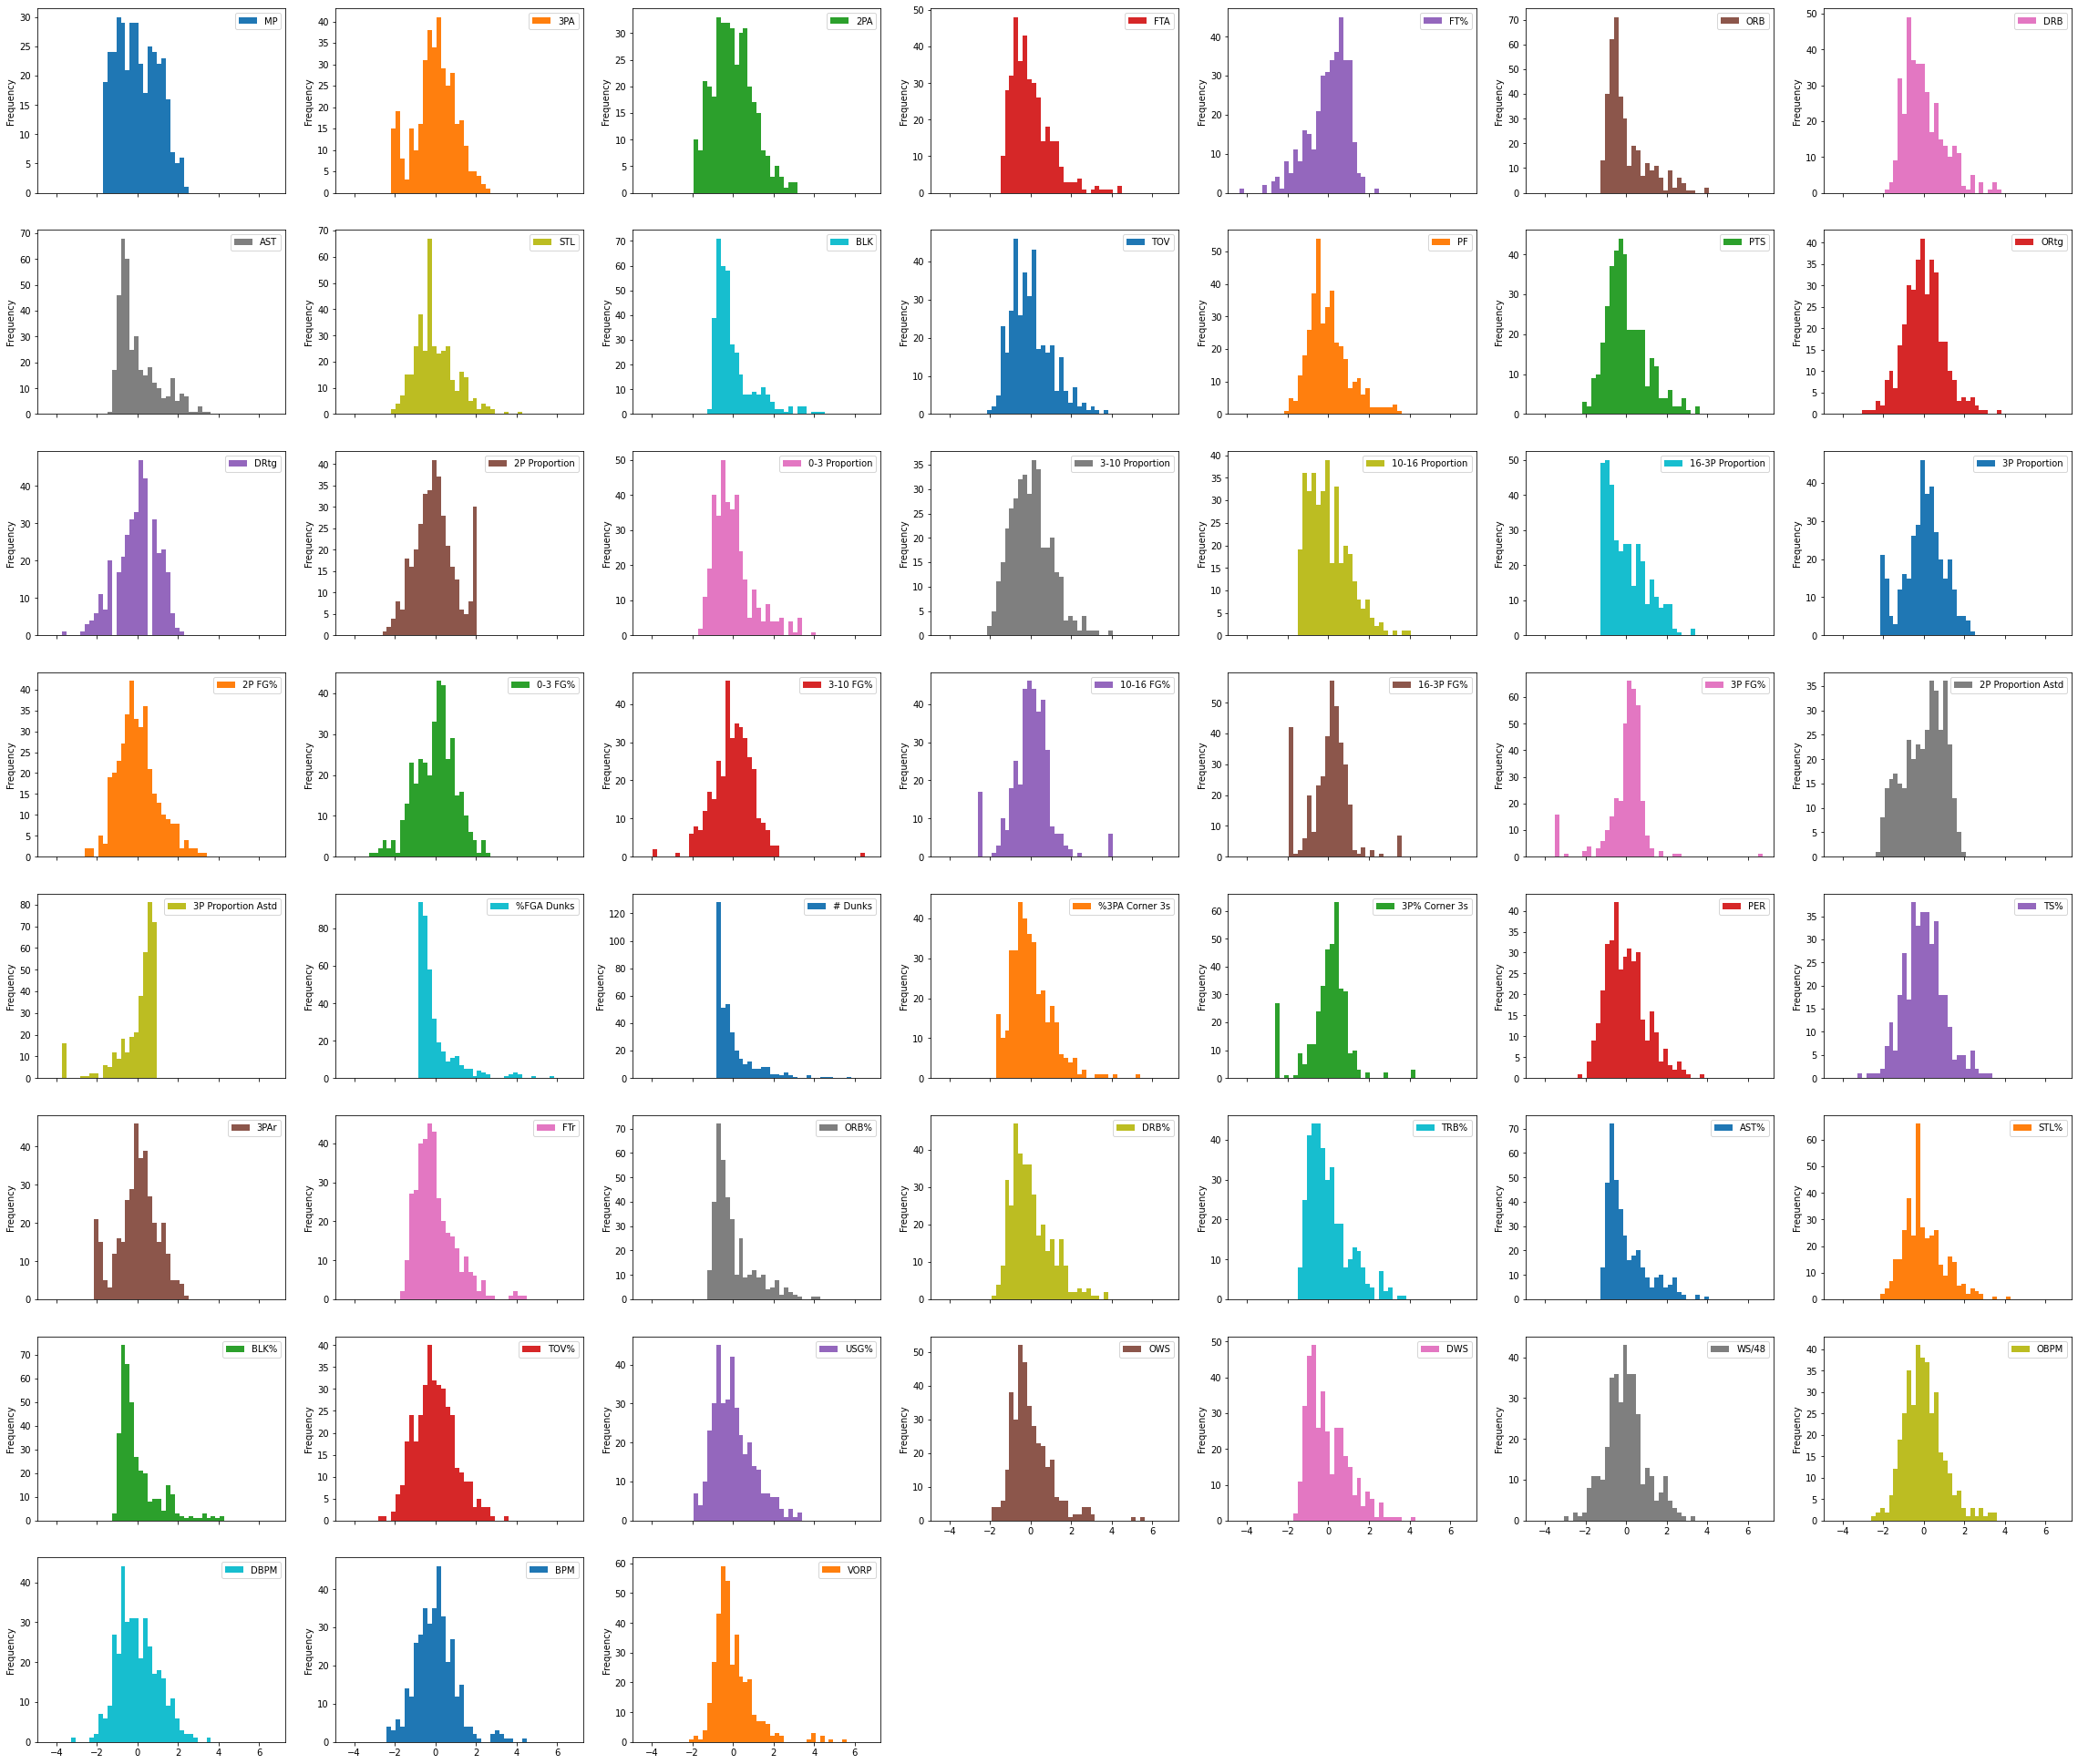

In [ ]:
std_df.plot.hist(subplots=True, layout = (8,7), figsize = (40,35), bins=50)

The data is mostly distributed normally. Some of the features are pretty skewed but I don't think this will be a big deal since we will be using models that don't assume this.

In [ ]:
std_df['Pos'].value_counts()

SG    93
PF    74
C     71
PG    68
SF    67
Name: Pos, dtype: int64

# KNN

Let's try KNN first. I will use test_size of 0.25 since this leaves about 100 players in the testing split. I could see an argument for a larger portion of players in the testing split. I will change it if the results are not consistent.

In [ ]:
X = std_df.drop(columns=["Pos"])
y = std_df.Pos

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred, margins=True)

col_0,C,PF,PG,SF,SG,All
Pos,,,,,,
C,11,4,0,0,0,15
PF,2,7,0,1,5,15
PG,0,0,13,0,4,17
SF,1,8,2,5,7,23
SG,0,2,3,3,16,24
All,14,21,18,9,32,94


We can see that the model tends to over predict SG's and probably PF's. The model is very conservative when it comes to predicting SF. This probably means that SF's are very spread out in the feature space.

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5531914893617021


In [ ]:
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_pred)) # try balanced accuracy

Balanced Accuracy: 0.5697527706734867


The dataset isn't so imbalanced that using balanced accuracy seems necessary.

Find best value for k.

k:2 , acc:0.5531914893617021
k:3 , acc:0.5106382978723404
k:4 , acc:0.5319148936170213
k:5 , acc:0.5212765957446809
k:6 , acc:0.5319148936170213
k:7 , acc:0.5
k:8 , acc:0.5106382978723404
k:9 , acc:0.574468085106383
k:10 , acc:0.5851063829787234
k:11 , acc:0.574468085106383
k:12 , acc:0.574468085106383
k:13 , acc:0.574468085106383
k:14 , acc:0.5531914893617021
k:15 , acc:0.5638297872340425
k:16 , acc:0.5531914893617021
k:17 , acc:0.5638297872340425
k:18 , acc:0.574468085106383
k:19 , acc:0.5319148936170213
k:20 , acc:0.5425531914893617
k:21 , acc:0.5425531914893617
k:22 , acc:0.5425531914893617
k:23 , acc:0.5212765957446809
k:24 , acc:0.5531914893617021
Best K: 10


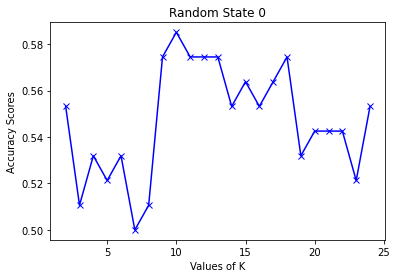

k:2 , acc:0.5106382978723404
k:3 , acc:0.44680851063829785
k:4 , acc:0.4787234042553192
k:5 , acc:0.48936170212765956
k:6 , acc:0.5212765957446809
k:7 , acc:0.48936170212765956
k:8 , acc:0.5319148936170213
k:9 , acc:0.4787234042553192
k:10 , acc:0.48936170212765956
k:11 , acc:0.46808510638297873
k:12 , acc:0.48936170212765956
k:13 , acc:0.5
k:14 , acc:0.5
k:15 , acc:0.4787234042553192
k:16 , acc:0.5
k:17 , acc:0.5212765957446809
k:18 , acc:0.5106382978723404
k:19 , acc:0.4787234042553192
k:20 , acc:0.48936170212765956
k:21 , acc:0.5
k:22 , acc:0.5212765957446809
k:23 , acc:0.5319148936170213
k:24 , acc:0.5212765957446809
Best K: 8


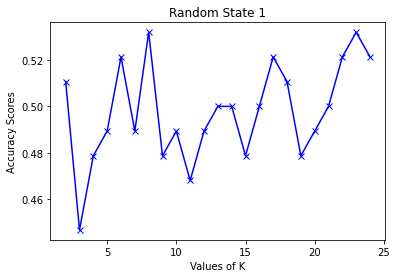

k:2 , acc:0.5212765957446809
k:3 , acc:0.5212765957446809
k:4 , acc:0.5425531914893617
k:5 , acc:0.4787234042553192
k:6 , acc:0.5319148936170213
k:7 , acc:0.5319148936170213
k:8 , acc:0.5106382978723404
k:9 , acc:0.5638297872340425
k:10 , acc:0.5638297872340425
k:11 , acc:0.5638297872340425
k:12 , acc:0.48936170212765956
k:13 , acc:0.5
k:14 , acc:0.4787234042553192
k:15 , acc:0.4787234042553192
k:16 , acc:0.46808510638297873
k:17 , acc:0.5
k:18 , acc:0.4787234042553192
k:19 , acc:0.5
k:20 , acc:0.48936170212765956
k:21 , acc:0.48936170212765956
k:22 , acc:0.46808510638297873
k:23 , acc:0.46808510638297873
k:24 , acc:0.46808510638297873
Best K: 9


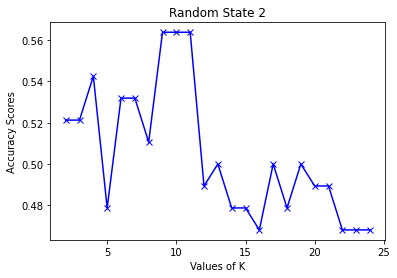

k:2 , acc:0.648936170212766
k:3 , acc:0.6063829787234043
k:4 , acc:0.6382978723404256
k:5 , acc:0.574468085106383
k:6 , acc:0.5531914893617021
k:7 , acc:0.5638297872340425
k:8 , acc:0.5957446808510638
k:9 , acc:0.5851063829787234
k:10 , acc:0.574468085106383
k:11 , acc:0.5957446808510638
k:12 , acc:0.574468085106383
k:13 , acc:0.5851063829787234
k:14 , acc:0.6063829787234043
k:15 , acc:0.6063829787234043
k:16 , acc:0.574468085106383
k:17 , acc:0.6170212765957447
k:18 , acc:0.5851063829787234
k:19 , acc:0.6063829787234043
k:20 , acc:0.5957446808510638
k:21 , acc:0.574468085106383
k:22 , acc:0.574468085106383
k:23 , acc:0.574468085106383
k:24 , acc:0.574468085106383
Best K: 2


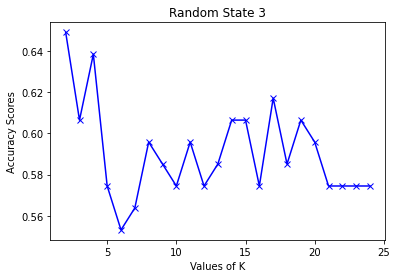

k:2 , acc:0.5638297872340425
k:3 , acc:0.5425531914893617
k:4 , acc:0.5851063829787234
k:5 , acc:0.6063829787234043
k:6 , acc:0.6063829787234043
k:7 , acc:0.6170212765957447
k:8 , acc:0.574468085106383
k:9 , acc:0.6063829787234043
k:10 , acc:0.6276595744680851
k:11 , acc:0.6382978723404256
k:12 , acc:0.6063829787234043
k:13 , acc:0.6170212765957447
k:14 , acc:0.5531914893617021
k:15 , acc:0.5212765957446809
k:16 , acc:0.5319148936170213
k:17 , acc:0.5531914893617021
k:18 , acc:0.5425531914893617
k:19 , acc:0.5638297872340425
k:20 , acc:0.574468085106383
k:21 , acc:0.5212765957446809
k:22 , acc:0.5319148936170213
k:23 , acc:0.5212765957446809
k:24 , acc:0.5106382978723404
Best K: 11


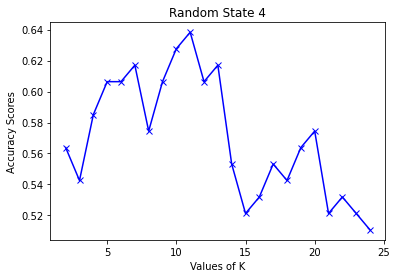

k:2 , acc:0.5212765957446809
k:3 , acc:0.5212765957446809
k:4 , acc:0.6063829787234043
k:5 , acc:0.574468085106383
k:6 , acc:0.5531914893617021
k:7 , acc:0.5106382978723404
k:8 , acc:0.5851063829787234
k:9 , acc:0.574468085106383
k:10 , acc:0.5531914893617021
k:11 , acc:0.5425531914893617
k:12 , acc:0.5851063829787234
k:13 , acc:0.6170212765957447
k:14 , acc:0.6170212765957447
k:15 , acc:0.5957446808510638
k:16 , acc:0.5851063829787234
k:17 , acc:0.574468085106383
k:18 , acc:0.574468085106383
k:19 , acc:0.5851063829787234
k:20 , acc:0.5851063829787234
k:21 , acc:0.5957446808510638
k:22 , acc:0.5957446808510638
k:23 , acc:0.6063829787234043
k:24 , acc:0.5957446808510638
Best K: 13


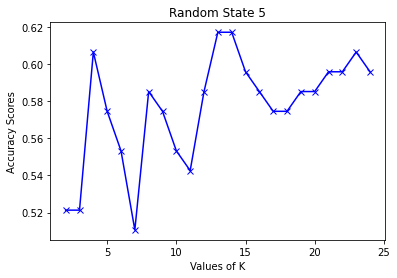

k:2 , acc:0.46808510638297873
k:3 , acc:0.5319148936170213
k:4 , acc:0.5319148936170213
k:5 , acc:0.5
k:6 , acc:0.5638297872340425
k:7 , acc:0.5
k:8 , acc:0.5319148936170213
k:9 , acc:0.5851063829787234
k:10 , acc:0.5638297872340425
k:11 , acc:0.5851063829787234
k:12 , acc:0.6276595744680851
k:13 , acc:0.5957446808510638
k:14 , acc:0.574468085106383
k:15 , acc:0.5531914893617021
k:16 , acc:0.574468085106383
k:17 , acc:0.5957446808510638
k:18 , acc:0.5957446808510638
k:19 , acc:0.5851063829787234
k:20 , acc:0.5638297872340425
k:21 , acc:0.574468085106383
k:22 , acc:0.5425531914893617
k:23 , acc:0.5319148936170213
k:24 , acc:0.5319148936170213
Best K: 12


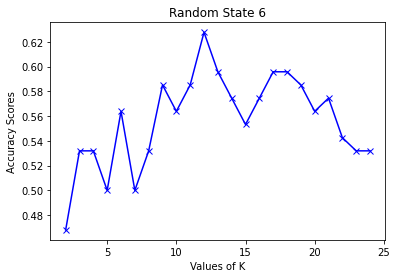

k:2 , acc:0.46808510638297873
k:3 , acc:0.44680851063829785
k:4 , acc:0.43617021276595747
k:5 , acc:0.48936170212765956
k:6 , acc:0.5319148936170213
k:7 , acc:0.5
k:8 , acc:0.4787234042553192
k:9 , acc:0.4787234042553192
k:10 , acc:0.5
k:11 , acc:0.5212765957446809
k:12 , acc:0.48936170212765956
k:13 , acc:0.5
k:14 , acc:0.48936170212765956
k:15 , acc:0.46808510638297873
k:16 , acc:0.48936170212765956
k:17 , acc:0.5
k:18 , acc:0.5
k:19 , acc:0.5
k:20 , acc:0.4787234042553192
k:21 , acc:0.5
k:22 , acc:0.5106382978723404
k:23 , acc:0.5212765957446809
k:24 , acc:0.5212765957446809
Best K: 6


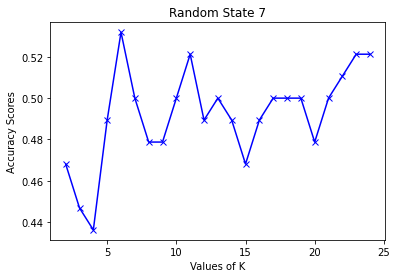

k:2 , acc:0.48936170212765956
k:3 , acc:0.5106382978723404
k:4 , acc:0.5212765957446809
k:5 , acc:0.5319148936170213
k:6 , acc:0.5212765957446809
k:7 , acc:0.5638297872340425
k:8 , acc:0.5319148936170213
k:9 , acc:0.5638297872340425
k:10 , acc:0.5425531914893617
k:11 , acc:0.5957446808510638
k:12 , acc:0.5957446808510638
k:13 , acc:0.5957446808510638
k:14 , acc:0.5851063829787234
k:15 , acc:0.5957446808510638
k:16 , acc:0.6170212765957447
k:17 , acc:0.5957446808510638
k:18 , acc:0.5851063829787234
k:19 , acc:0.6063829787234043
k:20 , acc:0.5957446808510638
k:21 , acc:0.5851063829787234
k:22 , acc:0.5957446808510638
k:23 , acc:0.6063829787234043
k:24 , acc:0.5957446808510638
Best K: 16


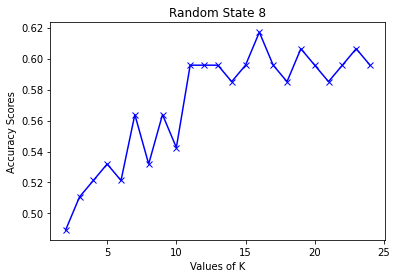

k:2 , acc:0.4574468085106383
k:3 , acc:0.5319148936170213
k:4 , acc:0.5
k:5 , acc:0.6170212765957447
k:6 , acc:0.5531914893617021
k:7 , acc:0.5638297872340425
k:8 , acc:0.5851063829787234
k:9 , acc:0.5851063829787234
k:10 , acc:0.5957446808510638
k:11 , acc:0.6063829787234043
k:12 , acc:0.6063829787234043
k:13 , acc:0.5851063829787234
k:14 , acc:0.5957446808510638
k:15 , acc:0.5957446808510638
k:16 , acc:0.6063829787234043
k:17 , acc:0.5957446808510638
k:18 , acc:0.5851063829787234
k:19 , acc:0.5638297872340425
k:20 , acc:0.574468085106383
k:21 , acc:0.5531914893617021
k:22 , acc:0.574468085106383
k:23 , acc:0.5851063829787234
k:24 , acc:0.5851063829787234
Best K: 5


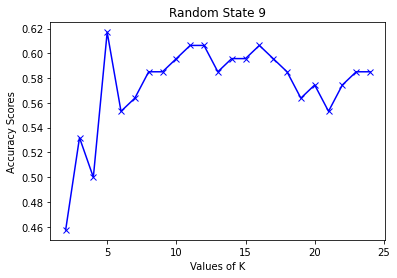

average scores: [(2, 0.5202127659574468), (3, 0.5170212765957446), (4, 0.5372340425531915), (5, 0.5382978723404255), (6, 0.5468085106382978), (7, 0.5340425531914893), (8, 0.5436170212765957), (9, 0.5595744680851064), (10, 0.5595744680851065), (11, 0.5691489361702127), (12, 0.5638297872340425), (13, 0.5670212765957447), (14, 0.5553191489361703), (15, 0.5457446808510639), (16, 0.55), (17, 0.5617021276595746), (18, 0.553191489361702), (19, 0.5521276595744682), (20, 0.5489361702127659), (21, 0.5436170212765957), (22, 0.5457446808510638), (23, 0.5468085106382979), (24, 0.5457446808510638)]


In [ ]:
import matplotlib.pyplot as plt

X = std_df.drop(columns=["Pos"])
y = std_df.Pos

K = range(2,25) # values for k to test

avg_scores = np.zeros(23) # average scores for each k


for j in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=j) # test random states 0-9
  scores = [] # keep track of scores for each iteration
  best = 0 # best k
  max = 0 # max accuracy score
  for x in K:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)  
    y_pred = knn.predict(X_test)
    ac = metrics.accuracy_score(y_test, y_pred)
    print(f'k:{x} , acc:{ac}') # print accuracy for each k
    scores.append(ac)
    if (ac>max): # find best k
      best = x
      max = ac
  avg_scores = avg_scores + scores

  print(f'Best K: {best}')
  plt.plot(K, scores, 'bx-') # plot scores for each k
  plt.xlabel('Values of K') 
  plt.ylabel('Accuracy Scores') 
  plt.title(f'Random State {j}')
  plt.show()
print(f'average scores: {[i for i in enumerate(avg_scores/10, 2)]}') # print average accuracy for each k

The best value for k looks to be 11. Becuase the dataset is smaller, we can see that we don't get a consistent best k between splits. It looks like we definitly want k>3 but there isn't an obvious best k here.

# SVM

Now I want to try support vector machine. I'm not sure if this will be a good model since there doesn't appear to be obvious groups in the data. This should outperform KNN though since it has the ability to find more complex groups by proojecting to higher dimensions.

I found that the best kernal to use is 'radial basis function', so I will use that here.

In [ ]:
from sklearn import svm

avg_accuracy = 0

avg_pre = np.zeros(5)
avg_rec = np.zeros(5)

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
  clf = svm.SVC()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  pre, rec, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred)
  print(f"r_state {i}: accuracy={acc}, precision={pre}, recall={rec}")
  avg_accuracy += acc
  avg_pre += pre
  avg_rec += rec

  

print(f'average_accuracy={avg_accuracy/10} average_precision={avg_pre/10} average_recall={avg_rec/10}')

r_state 0: accuracy=0.6063829787234043, precision=[0.68181818 0.53846154 0.81818182 0.21428571 0.60869565], recall=[0.88235294 0.38888889 0.85714286 0.23076923 0.56      ]
r_state 1: accuracy=0.6063829787234043, precision=[0.78947368 0.38888889 0.81818182 0.57142857 0.42857143], recall=[0.78947368 0.5        0.75       0.38095238 0.5625    ]
r_state 2: accuracy=0.5531914893617021, precision=[0.86363636 0.47368421 0.53846154 0.5        0.40625   ], recall=[0.82608696 0.5        0.7        0.16       0.72222222]
r_state 3: accuracy=0.6702127659574468, precision=[0.73913043 0.47368421 1.         0.22222222 0.66666667], recall=[0.80952381 0.5        0.86363636 0.15384615 0.8       ]
r_state 4: accuracy=0.6808510638297872, precision=[0.84210526 0.5625     0.68421053 0.66666667 0.64285714], recall=[0.84210526 0.6        0.8125     0.42105263 0.72      ]
r_state 5: accuracy=0.6595744680851063, precision=[0.86666667 0.55       0.7        0.66666667 0.60606061], recall=[0.86666667 0.73333333 0.

Average accuracy for SVM is about 62%. Average Precision: C: 79%, PF: 47%, PG: 78%, SF: 50%, SG: 56%. Average Recall: C: 80%, PF: 55%, PG: 79%, SF: 26%, SG: 71%. This model is much better at predicting correctly when the player is a center or point guard. The model over predicts shooting guards and power forwards and under predicts small forwards. Small forwards have a very low recall and moderate precision meaning the model is consistently not correctly predicting actual small forwards as being small forwards. We can see this in the crosstab for the last round of the model. The model only predicted 5 small forwards but there were 23 in the test split.

In [ ]:
pd.crosstab(y_test, y_pred, margins=True)

col_0,C,PF,PG,SF,SG,All
Pos,,,,,,
C,14,2,0,0,0,16
PF,3,13,0,0,2,18
PG,0,0,17,0,1,18
SF,2,8,0,3,10,23
SG,0,0,3,2,14,19
All,19,23,20,5,27,94


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score # quicker than running a bunch of random splits
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=8, random_state=1)
scores = cross_val_score(dtc, X, y, cv=5)
print(scores)
print(f'average: {scores.mean()}')

[0.49333333 0.54666667 0.57333333 0.51351351 0.48648649]
average: 0.5226666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(2,20,2):
  rfc = RandomForestClassifier(random_state=5, min_samples_split=i)
  scores = cross_val_score(rfc, X, y, cv=5)
  print(f"min_samples{i}:")
  print(scores, scores.sum()/5)

min_samples2:
[0.58666667 0.70666667 0.6        0.59459459 0.58108108] 0.6138018018018019
min_samples4:
[0.58666667 0.66666667 0.64       0.59459459 0.60810811] 0.6192072072072072
min_samples6:
[0.62666667 0.64       0.6        0.59459459 0.56756757] 0.6057657657657658
min_samples8:
[0.61333333 0.68       0.6        0.59459459 0.56756757] 0.6110990990990992
min_samples10:
[0.62666667 0.68       0.6        0.60810811 0.58108108] 0.6191711711711713
min_samples12:
[0.6        0.65333333 0.57333333 0.59459459 0.56756757] 0.5977657657657658
min_samples14:
[0.6        0.68       0.6        0.56756757 0.59459459] 0.6084324324324324
min_samples16:
[0.61333333 0.65333333 0.6        0.54054054 0.58108108] 0.5976576576576578
min_samples18:
[0.61333333 0.64       0.64       0.59459459 0.59459459] 0.6165045045045046


This is a method for determining the most important features in the dataset. We use the ExtraTreesClassifier and the feature_importances_ method to determine how much the classifier is using each feature to build the model. We can see that assists and rebounding stats are very important whereas the 'all in one' metrics like VORP and BPM are not very important. I wanted to use this to find features to drop, but I'm not seeing any that really stick out. Technique found at: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.01092541 0.01971762 0.01328315 0.01197932 0.01153631 0.03575637
 0.03396047 0.04795673 0.01811377 0.03293982 0.01754697 0.01640227
 0.01524257 0.01208044 0.01293087 0.01723086 0.01768244 0.01273658
 0.01571706 0.01478035 0.02094155 0.0200132  0.01495739 0.01383383
 0.01183027 0.01206595 0.01200675 0.03936881 0.01841332 0.02856153
 0.02039684 0.01968485 0.013032   0.01173723 0.01272753 0.01586379
 0.01159866 0.03048996 0.03365095 0.043048   0.03902736 0.01953606
 0.03099464 0.02077622 0.01367809 0.01068779 0.01134622 0.01427407
 0.01036871 0.01473993 0.01151805 0.01031109]


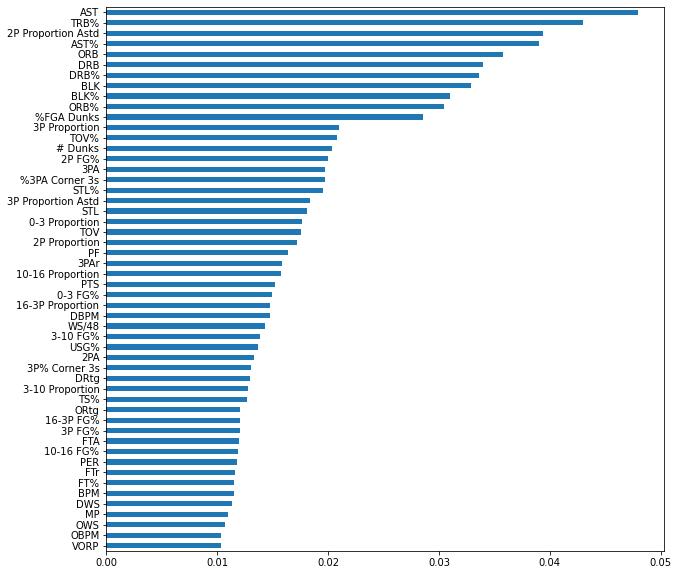

In [ ]:
data = std_df
X = data.drop(columns=['Pos']) #independent columns
y = data.Pos   #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(60).plot(kind='barh', figsize=(10,10))
plt.show()

# PCA

I wan't to decrease the dimensionality of the data using PCA to see if this helps with accuracy. If we have overfitting, this should help.

Text(0, 0.5, 'Percentage of variance explained (%)')

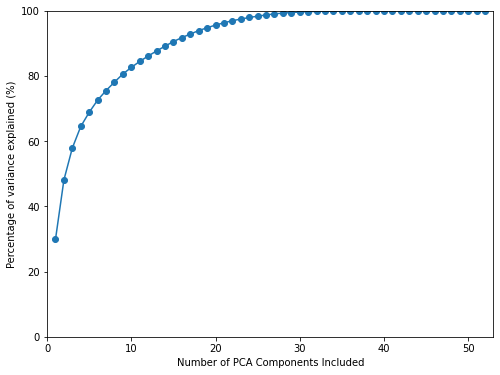

In [ ]:
from sklearn.decomposition import PCA
X = std_df.drop(columns=["Pos"])
y = std_df.Pos
pca = PCA() # principal component class
pca.fit(X) # fit to data
expl_var = pca.explained_variance_ratio_ # get the explained variance list
# get array of sum of explained variance at n components
expl_var_n_comp = np.array([sum(expl_var[0:i+1]) for i,n in enumerate(expl_var)])

plt.figure(figsize=(8,6)) #create cumulative proportion of variance plot
plt.plot(range(1,len(expl_var_n_comp)+1), expl_var_n_comp*100,'o-')
plt.axis([0, len(expl_var_n_comp)+1, 0, 100])
plt.xlabel('Number of PCA Components Included')
plt.ylabel('Percentage of variance explained (%)')

It looks like we'll need about 15 principal components to get 90% of the variance. If we use the PCA data with on SVM, we can see that the accuracy peaks at 14 principal components which is close to 90% variance explained.

In [ ]:
for n in range(5,21):
  X = std_df.drop(columns=["Pos"])
  y = std_df.Pos
  pca = PCA(n_components=n)
  pca.fit(X) # fit model
  principalComponents = pca.fit_transform(X) # fit transform to get pca data
  pca_df = pd.DataFrame(data = principalComponents # make pca dataframe
              , columns = ['principal component' + str(x) for x in range(1,n+1)], index=X.index)
  pca_df = pd.concat([pca_df, std_df.Pos], axis=1) # add positions to pca_df
  pca_df = pca_df.rename(columns={0:'Pos'})

  X = pca_df.drop(columns=["Pos"])
  y = pca_df.Pos

  scores=[]

  for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_pred, y_test))

  scores = np.array(scores)
  print(f"Number of principal compenents: {n}")
  print(f"Accuracy Scores:")
  print(scores)
  print(f'avg score: {scores.mean()}')

Number of principal compenents: 5
Accuracy Scores:
[0.54255319 0.53191489 0.5106383  0.65957447 0.68085106 0.59574468
 0.55319149 0.56382979 0.62765957 0.60638298]
avg score: 0.5872340425531914
Number of principal compenents: 6
Accuracy Scores:
[0.58510638 0.55319149 0.5        0.65957447 0.63829787 0.60638298
 0.55319149 0.55319149 0.59574468 0.59574468]
avg score: 0.5840425531914895
Number of principal compenents: 7
Accuracy Scores:
[0.59574468 0.59574468 0.55319149 0.69148936 0.67021277 0.59574468
 0.58510638 0.56382979 0.61702128 0.62765957]
avg score: 0.6095744680851064
Number of principal compenents: 8
Accuracy Scores:
[0.60638298 0.57446809 0.5        0.68085106 0.63829787 0.60638298
 0.58510638 0.54255319 0.63829787 0.62765957]
avg score: 0.6
Number of principal compenents: 9
Accuracy Scores:
[0.58510638 0.59574468 0.55319149 0.70212766 0.63829787 0.60638298
 0.53191489 0.54255319 0.67021277 0.61702128]
avg score: 0.6042553191489362
Number of principal compenents: 10
Accuracy S

# KNN (PCA)

Now let's see if the PCA data performs better on the KNN model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

features = std_df.drop(columns=["Pos"])
target = std_df.Pos

K = range(2,22)
avg_scores = np.zeros(20)

for i in range(8,18):
  pca = PCA(n_components=i)
  pca.fit(features)
  principalComponents = pca.fit_transform(features)
  pca_df = pd.DataFrame(data = principalComponents
              , columns = ['principal component' + str(x) for x in range(1,i+1)], index=X.index)
  pca_df = pd.concat([pca_df, std_df.Pos], axis=1)
  pca_df = pca_df.rename(columns={0:'Pos'})

  X = pca_df.drop(columns=["Pos"])
  y = pca_df.Pos

  avg_scores = np.zeros(20)

  for j in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=j)
    scores = []
    for x in K:
      knn = KNeighborsClassifier(n_neighbors=x)
      knn.fit(X_train,y_train)  
      y_pred = knn.predict(X_test)
      ac = metrics.accuracy_score(y_test, y_pred)
      scores.append(ac)
    avg_scores = avg_scores + scores

  print(f'average scores (PCs = {i}): {[i for i in enumerate(avg_scores/10, 2)]}')

average scores (PCs = 8): [(2, 0.524468085106383), (3, 0.5170212765957446), (4, 0.5595744680851064), (5, 0.5436170212765958), (6, 0.5595744680851065), (7, 0.5563829787234043), (8, 0.5765957446808512), (9, 0.5680851063829787), (10, 0.5585106382978723), (11, 0.55), (12, 0.551063829787234), (13, 0.5553191489361702), (14, 0.5553191489361702), (15, 0.5563829787234043), (16, 0.553191489361702), (17, 0.5627659574468085), (18, 0.5542553191489361), (19, 0.55), (20, 0.55), (21, 0.5499999999999999)]
average scores (PCs = 9): [(2, 0.5287234042553192), (3, 0.5287234042553192), (4, 0.5680851063829787), (5, 0.55), (6, 0.5648936170212766), (7, 0.5638297872340425), (8, 0.5638297872340425), (9, 0.5595744680851065), (10, 0.5595744680851064), (11, 0.5478723404255319), (12, 0.5489361702127659), (13, 0.5468085106382978), (14, 0.5553191489361702), (15, 0.5489361702127659), (16, 0.5574468085106382), (17, 0.5531914893617021), (18, 0.5382978723404255), (19, 0.5531914893617021), (20, 0.5531914893617023), (21, 0.

Accuracy is best around 12 principal components for KNN. The model performs similarly for k > 3. It looks like the best we could consistly do with KNN is around 55% accuracy. This isn't the best method for analyzing the data, but I just wanted to see if KNN has the potential to perform better on the PCA data.

# PCA Feature Exploration

In [ ]:
pca = PCA(n_components=14)
pca.fit(features)
principalComponents = pca.fit_transform(features)
pca_df = pd.DataFrame(data = principalComponents
            , columns = ['principal component' + str(x) for x in range(1,15)], index=features.index)
pca_df = pd.concat([pca_df, std_df.Pos], axis=1)
pca_df = pca_df.rename(columns={0:'Pos'})

X = pca_df.drop(columns=["Pos"])
y = pca_df.Pos

Let's plot the principal components against each other to see how well the positions are spread out. I'm going to only do the first 5 since the principal components become less important the higher the number.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


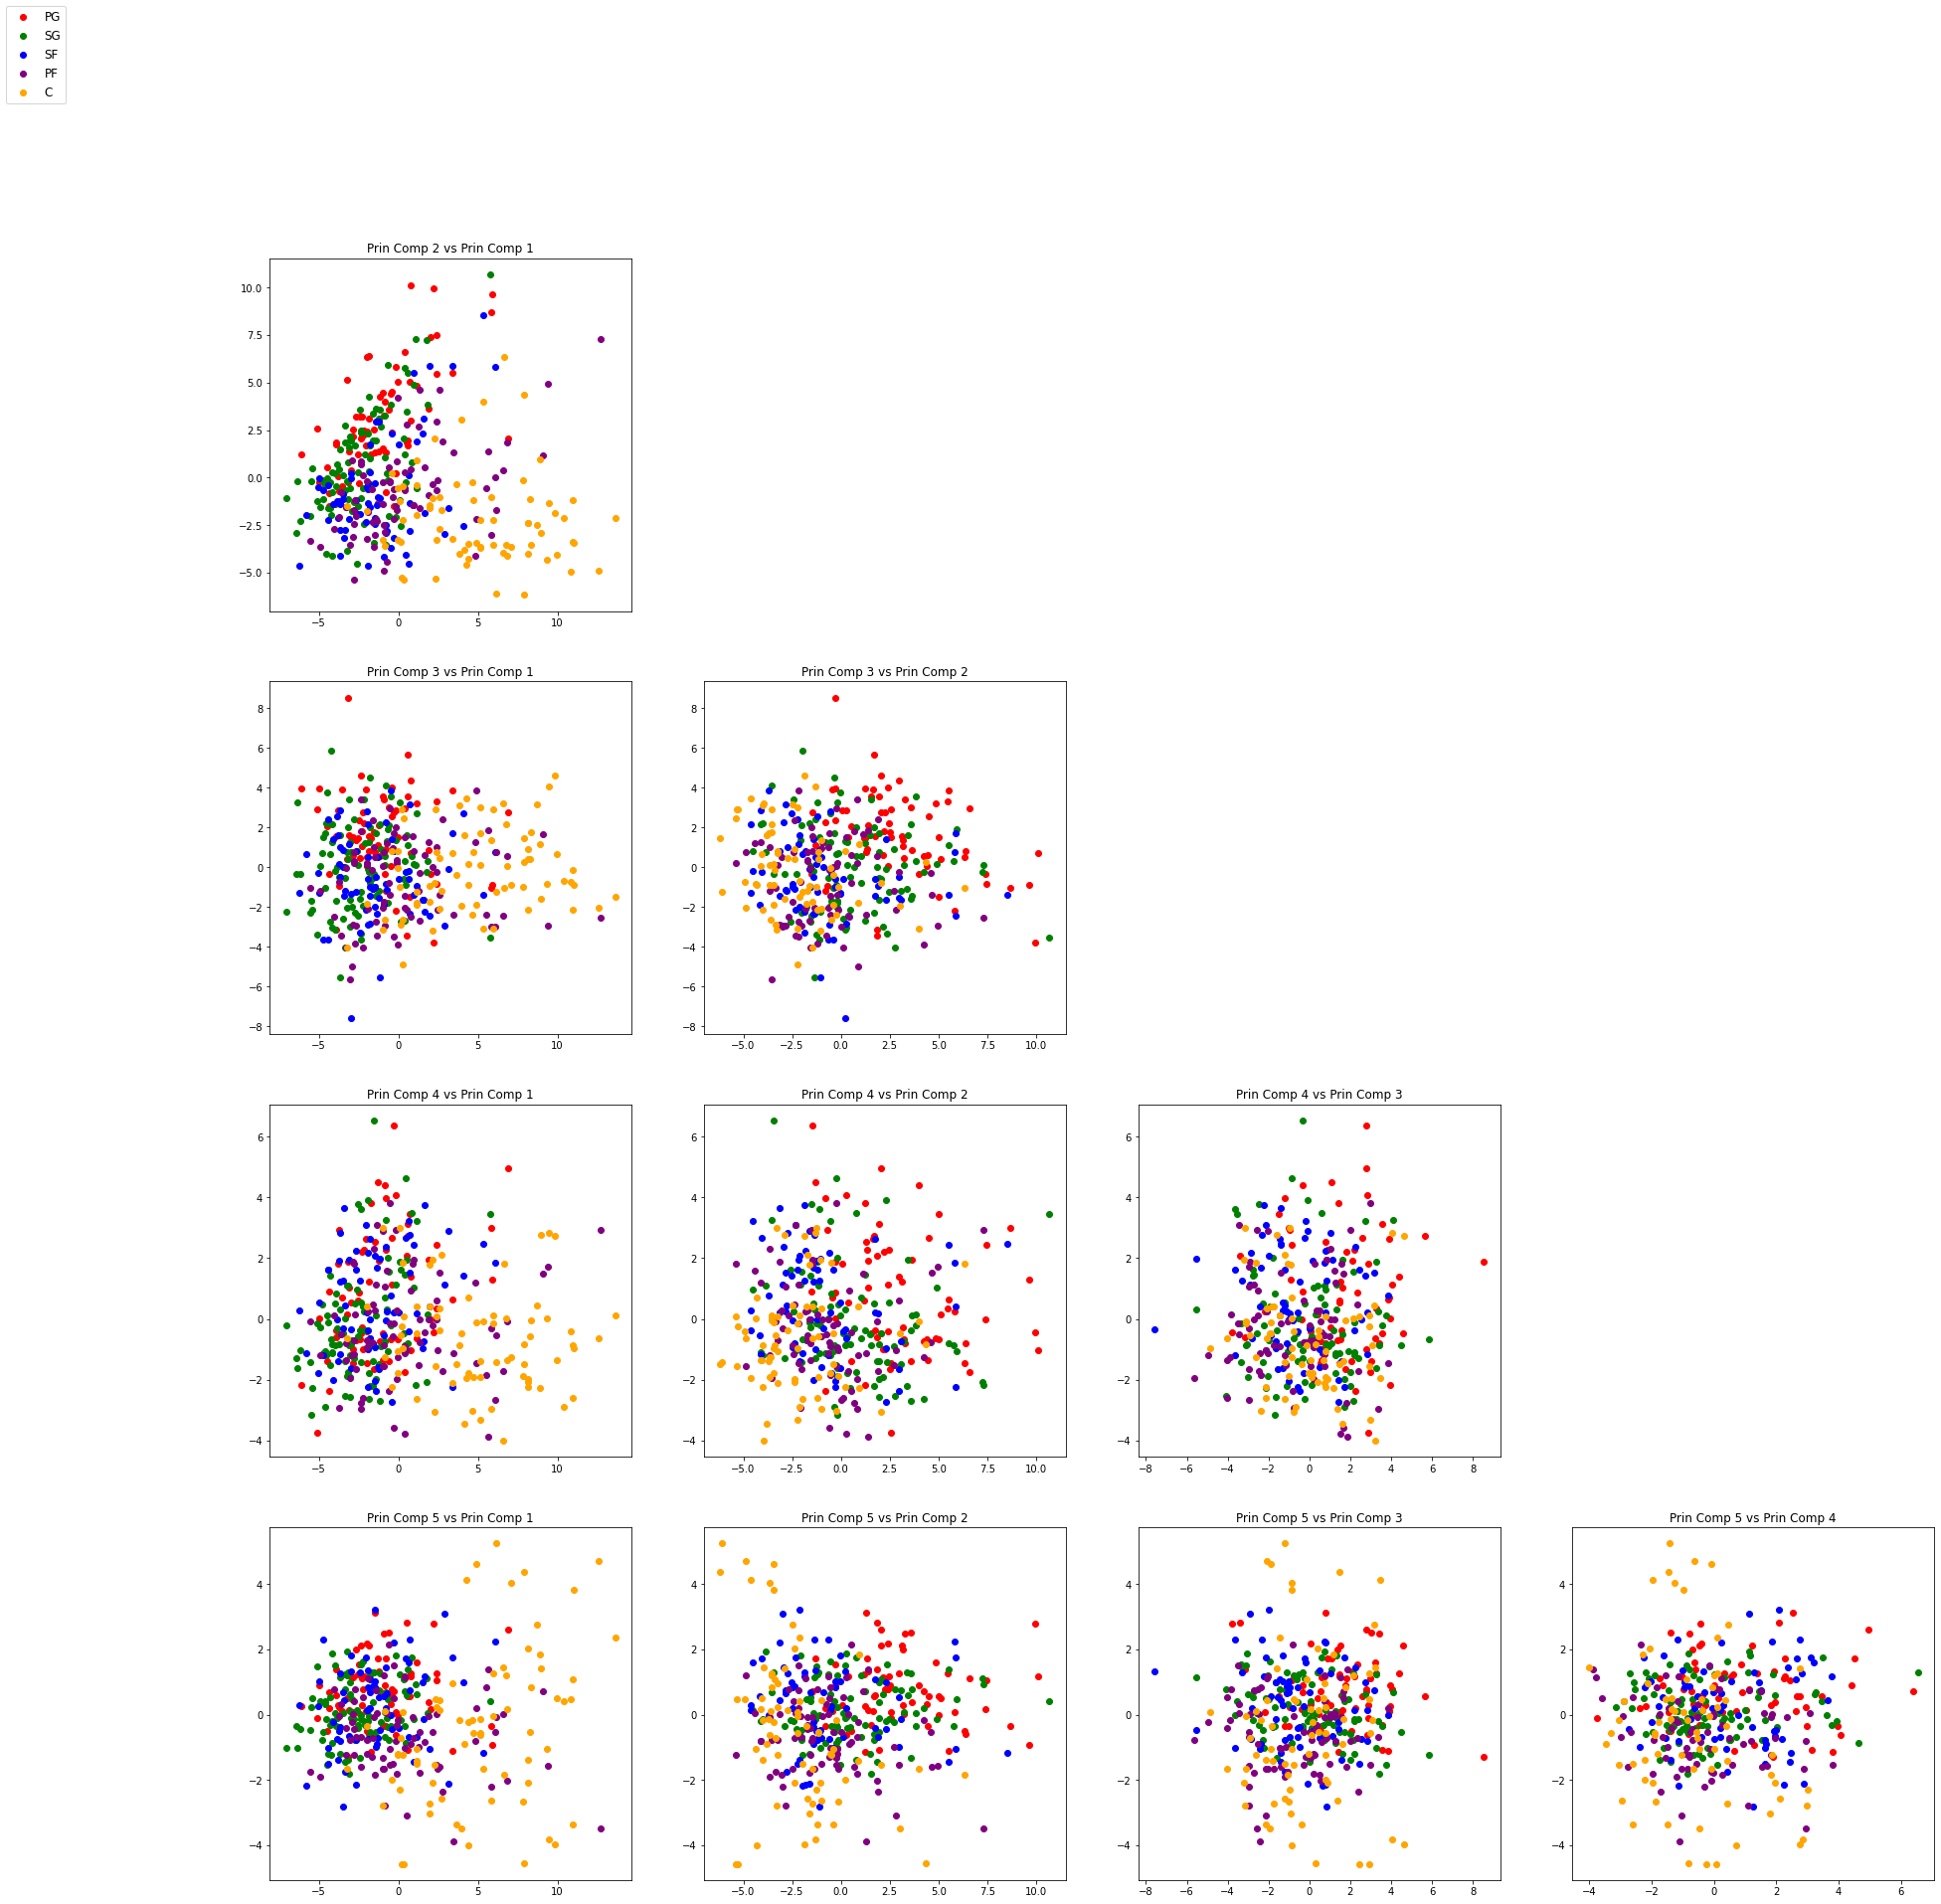

In [ ]:
features = X.to_numpy()
target = y.to_numpy()
target_names = ["PG", "SG", "SF", "PF", "C"]
def pos_to_int(x): # function to return int from position name, need this for colors
  if x == "PG":
    return 0
  elif x == "SG":
    return 1
  elif x == "SF":
    return 2
  elif x == "PF":
    return 3
  else:
    return 4
vfunc = np.vectorize(pos_to_int) # vectorize function
target = vfunc(target) # apply to target
colors = ['red', 'green', 'blue', 'purple', 'orange']

fig = plt.figure(figsize=(30,30)) # plot first 5 PC's against each other
for i in range(5):
  for j in range(i+1,5): # only want unique combinations of the PC's
    for t, c in zip(target_names,colors):
      indicesToKeep = pca_df['Pos'] == t # get array of indices where position is t
      ax = fig.add_subplot(4,4,(j-1)*4+i+1)
      ax.scatter(pca_df.loc[indicesToKeep, pca_df.columns[i]]
               , pca_df.loc[indicesToKeep, pca_df.columns[j]]
               , c = c)
      ax.set_title(f"Prin Comp {j+1} vs Prin Comp {i+1}")
      
fig.legend(target_names, loc='upper left', fontsize='large')

Centers and point guards are usually towards the outside of the main grouping of point. Shooting guards, small forwards and power forwards are all pretty intermixed towards the center of the grouping. Small forwards in particular appear to be spread out relatively evenly from the middle of the plot.

Now we want to see how each feature is contributing to each principal component. We can use the components_ attribute of the PCA class to see this. components_ gives the directions of each component of pca in the original feature space. We get a number for each feature for each component. This number tells us how much that feature contributes to the value for that component. We want to find the features that contribute most for each component. Then we can use some of our intuition about basketball to define each principal component as being indicative of some set of skills.

In [ ]:
[i for i in zip(std_df.columns[1:], pca.components_.T)] # get direction for each component

[('MP', array([ 0.05604897,  0.17743261, -0.09044825,  0.0554639 ,  0.01825527,
          0.06129964, -0.1693305 , -0.21174576, -0.35420194,  0.04770877,
         -0.17474167, -0.08403754,  0.37979879, -0.0494242 ])),
 ('3PA',
  array([-0.15774576,  0.13961113, -0.18849229,  0.00077708, -0.15397045,
         -0.22828891, -0.03463204,  0.02448617,  0.10249017,  0.10964659,
         -0.09475275, -0.00087755, -0.05768946,  0.01638901])),
 ('2PA',
  array([ 0.14629829,  0.17142382,  0.17984895, -0.15229209, -0.08782958,
          0.08166071, -0.18037382,  0.07667918,  0.00663421,  0.10269492,
         -0.00937769, -0.00533566, -0.02211276, -0.09171096])),
 ('FTA',
  array([ 0.13924538,  0.18914033,  0.05894239, -0.068177  ,  0.00789794,
         -0.23375819, -0.16458266,  0.11423294, -0.00342894, -0.02700815,
         -0.06152645,  0.18911697, -0.08954528,  0.29081997])),
 ('FT%',
  array([-0.09011587,  0.16330854, -0.13515788, -0.05740627,  0.00416838,
          0.14539964,  0.01157742,  

In [ ]:
abs_pca_comp = np.abs(pca.components_) # find abs of components
sorted_components_i = np.argsort(abs_pca_comp) # sort components
i_to_col = dict(enumerate(std_df.columns[1:])) # get the feature names
sorted_components = np.vectorize(i_to_col.get)(sorted_components_i) # sorted feature names
for i in range(14): # print most important features for each component
  print(f"Top 10 contributors to principal component {i+1}")
  print(np.flip(sorted_components[i][-10:]), "\n") # need to flip since sorted min to max

Top 10 contributors to principal component 1
['TRB%' '# Dunks' 'ORB%' 'ORB' '0-3 Proportion' 'PER' 'WS/48'
 '2P Proportion' '3P Proportion' '3PAr'] 

Top 10 contributors to principal component 2
['USG%' 'PTS' 'AST%' 'OBPM' 'AST' '2P Proportion Astd' 'TOV' 'VORP' 'FTA'
 'PF'] 

Top 10 contributors to principal component 3
['TS%' 'ORtg' 'TOV%' '2P Proportion' '3PAr' '3P Proportion'
 '3-10 Proportion' 'TOV' 'WS/48' 'OWS'] 

Top 10 contributors to principal component 4
['STL' 'STL%' 'DBPM' 'DRtg' 'DWS' 'TOV%' '2PA' 'AST' 'PTS' 'VORP'] 

Top 10 contributors to principal component 5
['DRB' 'DRB%' 'ORtg' 'TRB%' 'TS%' '3P Proportion Astd' 'DRtg' 'FTr'
 '%3PA Corner 3s' 'USG%'] 

Top 10 contributors to principal component 6
['10-16 Proportion' '16-3P Proportion' '3-10 FG%' '10-16 FG%' 'FTA' '3PA'
 'FTr' '3P Proportion Astd' '16-3P FG%' 'TOV'] 

Top 10 contributors to principal component 7
['TOV%' '3-10 FG%' 'AST' 'AST%' '10-16 FG%' '# Dunks' 'STL%' 'STL' '2PA'
 'MP'] 

Top 10 contributors to pr

My interpretation of what each principal component is rating.

1. Paint play (rebounds, dunks, layups)
2. Creation (assists, points, high usage)
3. Inverse offensive efficiency (low TS, low ORtg, high turnovers)
4. Defensive efficiency (high defensive stats)
5. Offensive tendency (high ORtg, Low DRtg, Low DRB, high TS%)
6. Inverse mid-range tendency (low mid-range, high 3P, high inside shots)
7. Passing/ballhandling (high turnovers and assists)
8. Inverse 3Pt efficiency (low 3pt%)
9. Bench tendency (low minutes)
10. Floater efficiency/inverse low 2P efficiency
11. Mid range efficiency/inverse close and long midrange efficiency
12. "3 and D"
13. Foul drawing
14. Long midrange tendency/steals

These are not perfect categories as they don't encapsulate everything that each PC is based on, just the most important features and their direction. They should help us make some generalizations about the groups of players though.

In [ ]:
pca_df.groupby("Pos").mean()

,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6,principal component7,principal component8,principal component9,principal component10,principal component11,principal component12,principal component13,principal component14
Pos,,,,,,,,,,,,,,
C,4.978841,-2.193065,-0.195596,-0.677366,-0.439216,0.027942,0.450111,-0.071209,0.278262,-0.135103,-0.103822,0.009849,0.034472,-0.104545
PF,0.439559,-0.674092,-0.767233,-0.356765,-0.649519,-0.080792,-0.140669,0.192354,-0.401607,0.078345,-0.007713,-0.101230,-0.090505,0.157597
PG,-1.105991,2.909310,1.571141,0.802734,0.711452,0.111641,0.768198,-0.003880,0.268598,-0.333443,0.232815,-0.024771,0.180743,-0.220696
SF,-1.334412,-0.764713,-0.548950,0.515762,0.244809,0.072958,-0.433515,0.038800,-0.295392,-0.063749,-0.126729,-0.041056,-0.140754,0.179033
SG,-2.380774,0.634335,0.006501,-0.157510,0.155567,-0.091237,-0.481079,-0.123807,0.123537,0.330538,0.006469,0.120720,0.014944,-0.013197


We can see that centers are high in the 'Post Play' component and point guards have a high 'Creation' component which makes sense. 

# Decision Tree and Random Forest

I want to try two classification models, decision tree and random forest on the pca data. I'm expecting these to give similar results to SVM with random forest outperforming decision tree.

In [ ]:
X = std_df.drop(columns=["Pos"]) # redo pca with 14 components
y = std_df.Pos
pca = PCA(n_components=14)
pca.fit(X)
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents
            , columns = ['principal component' + str(x) for x in range(1,15)], index=X.index)
pca_df = pd.concat([pca_df, std_df.Pos], axis=1)
pca_df = pca_df.rename(columns={0:'Pos'})

X = pca_df.drop(columns=["Pos"])
y = pca_df.Pos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score # quicker than running a bunch of random splits
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=8, random_state=1)
scores = cross_val_score(dtc, X, y, cv=5)
print(scores)
print(f'average: {scores.mean()}')

[0.52       0.32       0.42666667 0.41891892 0.60810811]
average: 0.45873873873873877


Decision tree looks like it will perform pretty poorly. Let's tree random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(2,20,2):
  rfc = RandomForestClassifier(random_state=5, min_samples_split=i)
  scores = cross_val_score(rfc, X, y, cv=5)
  print(f"min_samples{i}:")
  print(scores, scores.sum()/5)

min_samples2:
[0.56       0.53333333 0.6        0.59459459 0.56756757] 0.5710990990990992
min_samples4:
[0.57333333 0.54666667 0.57333333 0.60810811 0.58108108] 0.5765045045045045
min_samples6:
[0.56       0.50666667 0.61333333 0.59459459 0.52702703] 0.5603243243243243
min_samples8:
[0.6        0.54666667 0.57333333 0.58108108 0.55405405] 0.571027027027027
min_samples10:
[0.6        0.57333333 0.53333333 0.58108108 0.52702703] 0.562954954954955
min_samples12:
[0.6        0.54666667 0.54666667 0.59459459 0.55405405] 0.5683963963963963
min_samples14:
[0.6        0.50666667 0.53333333 0.58108108 0.55405405] 0.555027027027027
min_samples16:
[0.57333333 0.49333333 0.6        0.59459459 0.54054054] 0.5603603603603604
min_samples18:
[0.61333333 0.52       0.58666667 0.56756757 0.54054054] 0.5656216216216216


This performs much better than decision tree but not as well as SVM, so I'm not going to dig deep into the results for now.

# Unsupervised Clustering

Classification of players went alright. I think we learned that apart from point guards and centers, it is very difficult to classify players accurately using their stats. Now I want to see how an upsupervised model would group the players.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pca_df.drop(columns=["Pos"])

for i in range(2, 20):
  km = KMeans(n_clusters=i, max_iter=1000, tol=0.01) # KMeans for 2-19 clusters
  km.fit(X)
  ss = silhouette_score(X, km.labels_)
  print(f'cluster: {i}, silhouette: {ss}')

cluster: 2, silhouette: 0.31245346402187246
cluster: 3, silhouette: 0.19632786492066034
cluster: 4, silhouette: 0.14312559238169348
cluster: 5, silhouette: 0.13289769716569194
cluster: 6, silhouette: 0.13429831485988578
cluster: 7, silhouette: 0.12183659930181426
cluster: 8, silhouette: 0.12162748814166173
cluster: 9, silhouette: 0.12074945265500048
cluster: 10, silhouette: 0.11704525756322119
cluster: 11, silhouette: 0.110802027718857
cluster: 12, silhouette: 0.11098402983935778
cluster: 13, silhouette: 0.11049591987722363
cluster: 14, silhouette: 0.10989644439248362
cluster: 15, silhouette: 0.11329738774855043
cluster: 16, silhouette: 0.10089266261100995
cluster: 17, silhouette: 0.10517482694261085
cluster: 18, silhouette: 0.10746945783470178
cluster: 19, silhouette: 0.11619844382314892


KMeans looks like its not going to give great results. I'm going to try another clustering method called agglomerative heirarchical clustering that I found online. This method uses some 'distance' function and finds clusters by finding the two clusters with the minimum 'distance' between them, making them a single cluster, and repeating until there is one cluster. We can make a graph showing how the clusters were formed called a dendrogram. Later, we can set a distance limit and once we reach that distance in the algorithm, we will have our clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X = std_df.drop(columns=["Pos"])

for i in range(1, 20):
  ac = AgglomerativeClustering(None, distance_threshold=i) # get a clustering for distances 1-20
  ac.fit(X)
  ss = silhouette_score(X, ac.labels_)
  print(f'clusters: {ac.n_clusters_}, silhouette: {ss}')

clusters: 371, silhouette: 0.00872896269488199
clusters: 358, silhouette: 0.05252208125618864
clusters: 346, silhouette: 0.07063587842003641
clusters: 302, silhouette: 0.1041115657878123
clusters: 236, silhouette: 0.1263362106960783
clusters: 180, silhouette: 0.12738117132555354
clusters: 134, silhouette: 0.12143588989157682
clusters: 96, silhouette: 0.10710559850690508
clusters: 71, silhouette: 0.09339754867738446
clusters: 60, silhouette: 0.08905485470881079
clusters: 49, silhouette: 0.08749050586611086
clusters: 38, silhouette: 0.07801595165033509
clusters: 30, silhouette: 0.08374216532529995
clusters: 27, silhouette: 0.07915684954783817
clusters: 22, silhouette: 0.07635296373930586
clusters: 21, silhouette: 0.07317563964805934
clusters: 16, silhouette: 0.08121704070812776
clusters: 15, silhouette: 0.07828690567276997
clusters: 15, silhouette: 0.07828690567276997


We can see that the algorithm starts with a cluster for each player. As we increase the distance threshold, the number of clusters decreases.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X = std_df.drop(columns=["Pos"])
Z = linkage(X, 'ward') # get the clustering of X using Ward's min variance as distance

Let's use std_df for now. linkage from scipy.cluster.hierarchy performs the clustering algorithm and gives a matrix that details which clusters were combined, the 'distance' between them, and size of the resulting cluster. I tried every distance formula and found 'ward' to be the best. It uses the minimum increase in within cluster variance to decide which clusters it will combine in each step.

In [ ]:
Z

array([[283.        , 284.        ,   0.80338319,   2.        ],
       [ 22.        ,  23.        ,   0.90129373,   2.        ],
       [304.        , 305.        ,   1.01476872,   2.        ],
       ...,
       [736.        , 740.        ,  39.74327913, 226.        ],
       [741.        , 742.        ,  65.26218331, 324.        ],
       [738.        , 743.        ,  83.27931445, 373.        ]])

We can see that the algorithm stats by grouping single players into clusters of 2. At the last step, we have a single cluster of all the players.

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.5924290400754105

The cophenetic correlation tells us how well our dendrogram preserves the original distances between the datapoints. A value closer to one is better.

In [ ]:
def index_to_player(i): # function to return players using index
  return players.iloc[i]

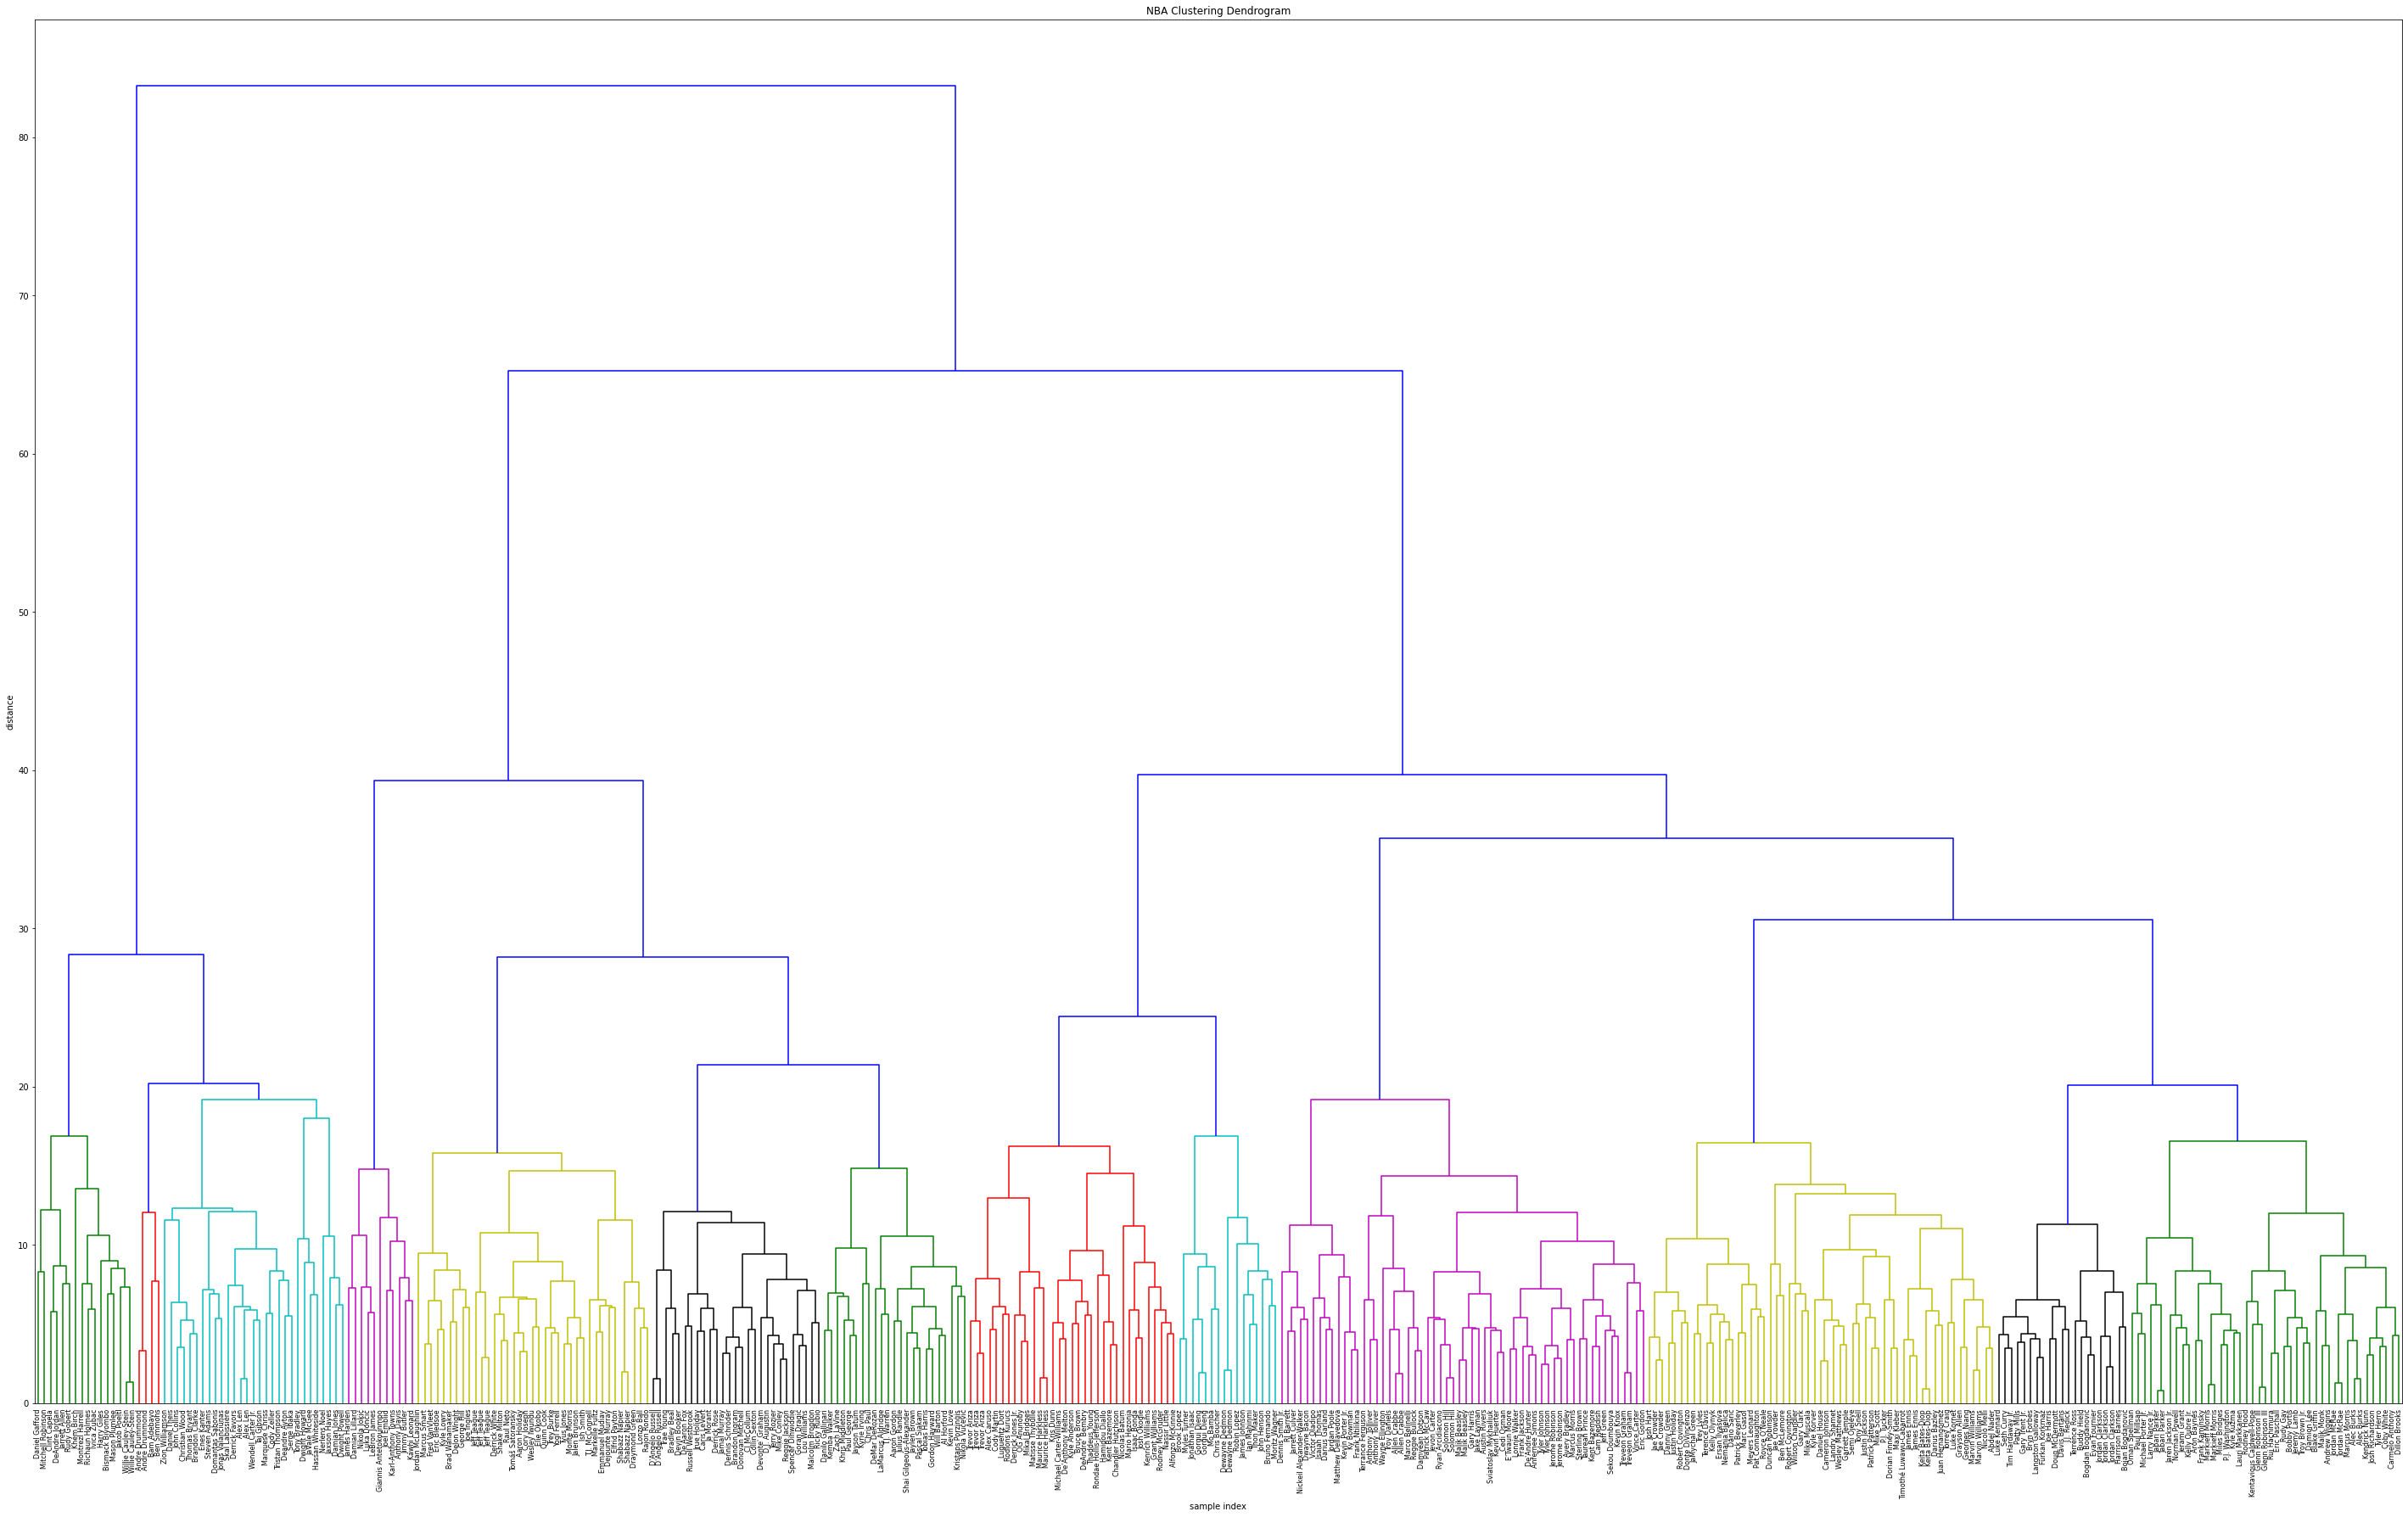

In [ ]:
plt.figure(figsize=(50, 30))
plt.title('NBA Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=7.5,  # font size for the x axis labels
    color_threshold=20, # distance at which we cutoff to make groups
    leaf_label_func=index_to_player  # function that gives us player names at leaves
)
plt.show()

From my experience watching basketball, this is not a bad grouping. It is especially good at grouping centers and 'star' players (players that have the ball a lot). Additionally, I think you could make a case that there is a decent label for each group.

In [ ]:
X = std_df.drop(columns=["Pos"])

pca = PCA(n_components=14)
pca.fit(X)
principalComponents = pca.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents
            , columns = ['principal component' + str(x) for x in range(1,15)], index=X.index)
pca_df = pd.concat([pca_df, std_df.Pos], axis=1)
pca_df = pca_df.rename(columns={0:'Pos'})

In [ ]:
X = pca_df.drop(columns=["Pos"])
Z = linkage(X, 'ward')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.5911804362804614

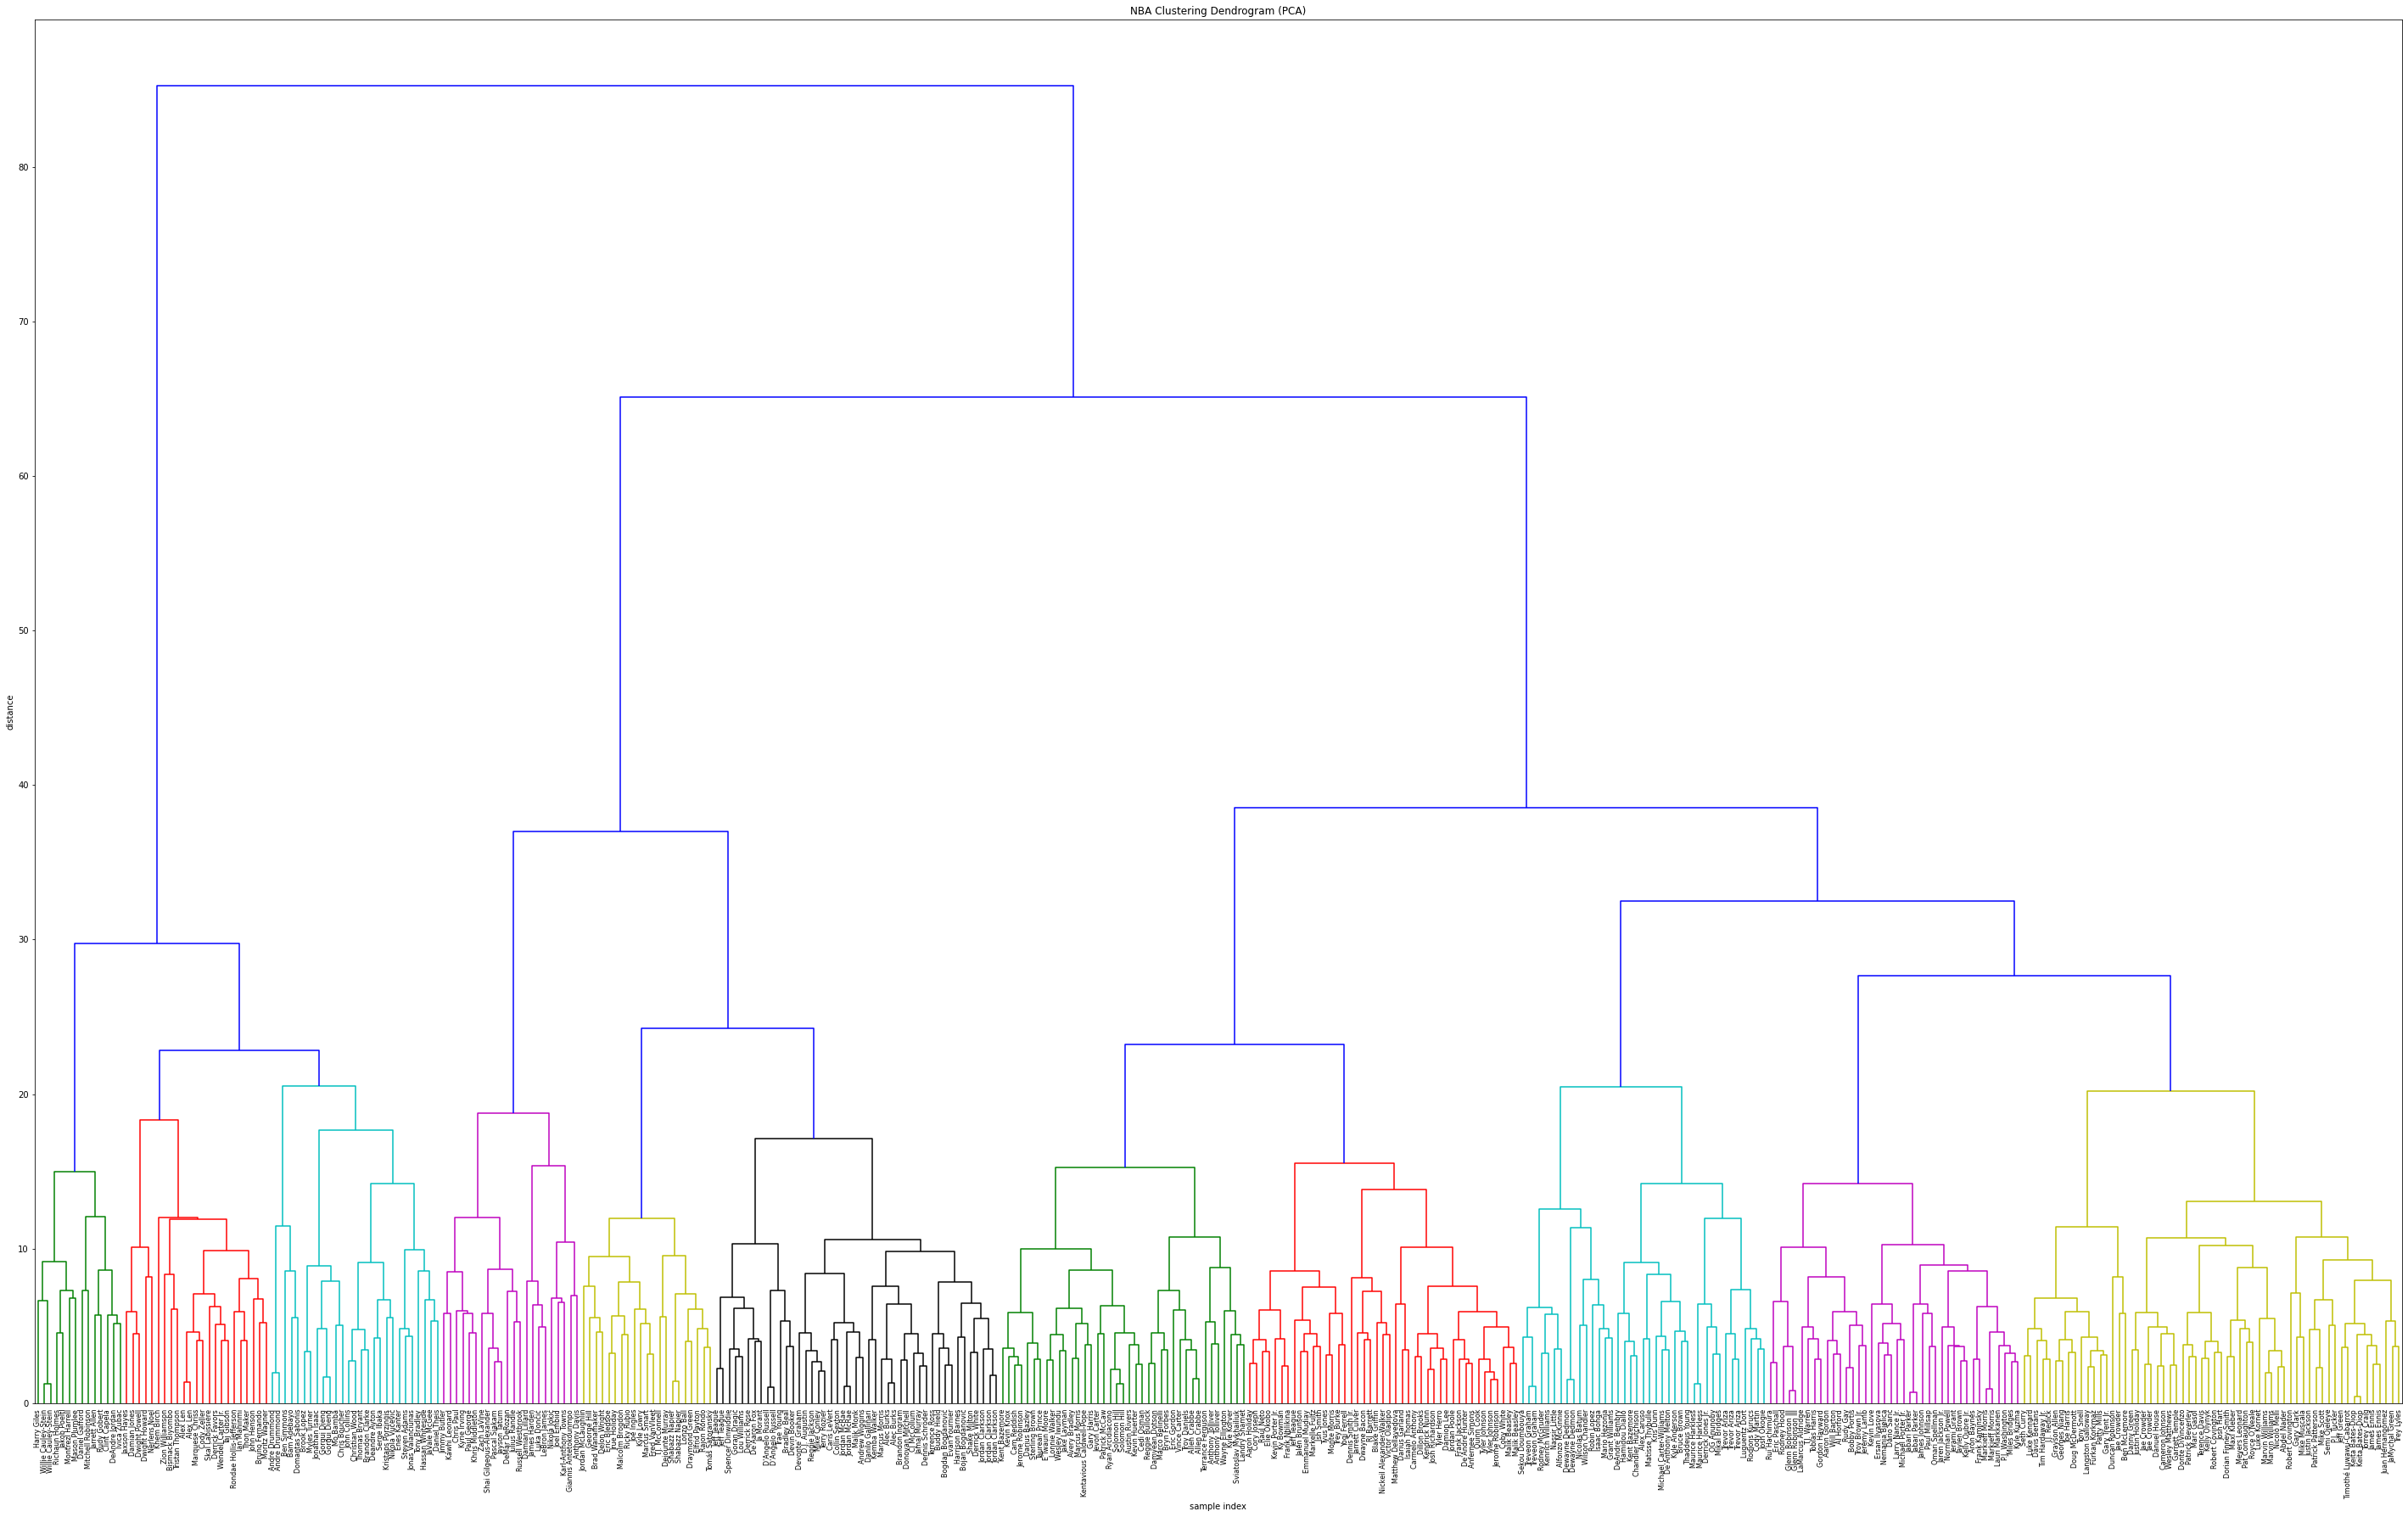

In [ ]:
plt.figure(figsize=(50, 30))
plt.title('NBA Clustering Dendrogram (PCA)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
    color_threshold=21,
    leaf_label_func=index_to_player
)
plt.show()

PCA and standardized data have very few differences if we use the same parameters for the dendogram. I like this dendrogram a bit more though. The groups are a bit more even and I think it is a bit easier to define what type of player is in each group.

Using the above dendrogram, we can see that the players were split into 11 groups when we cut off the grouping at a distance of 21.

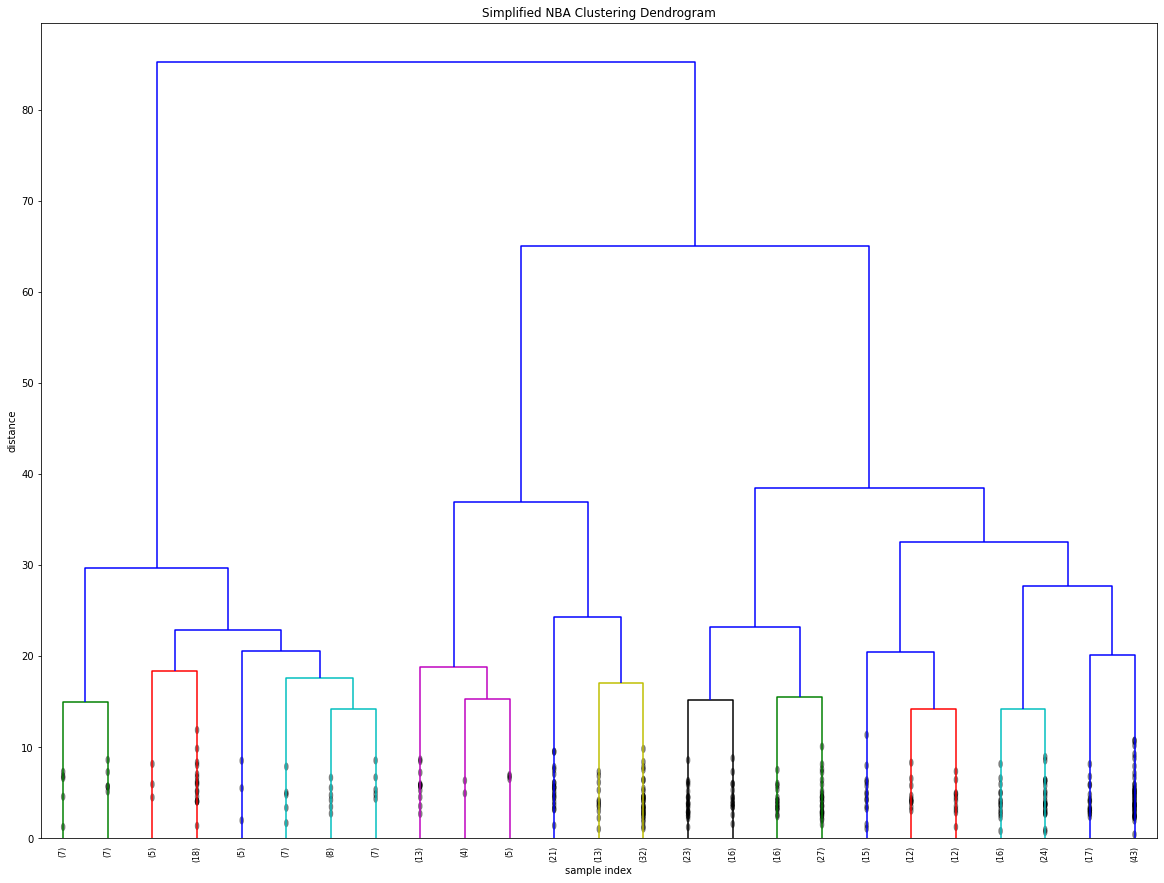

In [ ]:
plt.figure(figsize=(20, 15))
plt.title('Simplified NBA Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    p=25,
    truncate_mode='lastp',
    leaf_rotation=90.,
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted=True,
    color_threshold=20
)
plt.show()

Now we can use fcluster to get an array that gives the group for each player. We will use the same distance (21) as in the dendrogram and we should get 11 groups.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 21
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 3,  3, 10,  8, 11,  1,  9,  4,  8,  9,  7,  9,  9,  9,  6,  3,  8,
        5,  3,  6,  8, 10, 11, 11,  9, 10,  7,  9,  7,  6,  8,  8,  7,  9,
       11, 11,  2,  2, 10,  5,  6,  6,  9,  6,  3,  8,  7,  3,  9, 10,  5,
        8,  9, 10,  7, 10,  8,  3,  7,  8,  6,  6,  4,  7,  1,  7,  7,  2,
        9,  9,  1,  1,  9,  2, 11,  3,  6,  6,  6,  3,  6, 11,  8, 11, 11,
        7,  7, 11, 11, 11, 11,  8, 11,  7,  4, 11,  9,  9,  8,  4,  9,  3,
        3,  6, 11,  4,  9,  7,  9,  6,  3,  3,  9,  7,  4, 11, 11,  2,  7,
        2,  8, 11,  7,  6,  6,  8,  1,  6, 11,  8, 11, 10,  4,  2,  1,  4,
        1, 10,  7,  6,  9,  9, 10, 11,  5, 11, 11,  8, 10, 11,  4,  9,  9,
        1,  7, 11, 10, 11,  2, 10,  2, 11,  8,  9,  6,  5,  7,  7,  8,  5,
       11,  2,  1, 10, 10, 11,  2,  7,  8,  9,  3, 10,  5,  6,  4,  3,  7,
        8, 10, 11,  6,  4, 11, 10,  8,  8,  4,  2,  9,  8,  1,  8, 10,  3,
       11, 11,  7, 11, 11,  7,  9, 10,  2, 10,  4,  7,  8,  2,  2,  4, 11,
        6,  4,  9,  3,  9

In [ ]:
pca_ri_df = pca_df.reset_index() # reset index of pca so that we can add clusters

In [ ]:
pca_ri_df

,index,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6,principal component7,principal component8,principal component9,principal component10,principal component11,principal component12,principal component13,principal component14,Pos
0,0,8.273979,-1.141051,0.433183,-0.573242,-0.542628,1.960141,0.972963,-0.825864,-2.830889,-1.142425,0.861348,2.168695,-0.411196,-0.476034,C
1,1,9.062655,1.158288,1.645073,1.497957,0.719758,0.913551,-0.664400,-1.918288,-2.464395,0.487670,-0.963778,-0.693800,1.149162,2.041210,PF
2,2,2.282985,2.066782,-0.766835,-3.066260,-1.548770,3.609067,-1.214163,-0.604190,1.505516,-0.272749,-0.091205,-0.013141,0.348908,-0.104205,C
3,4,-4.470276,-0.045591,3.773857,0.100534,-1.528017,-2.760989,0.536533,0.476233,-0.082620,-0.662952,-0.383760,0.230564,0.413303,-1.146428,SG
4,5,-3.238186,-0.171678,-2.020565,-1.895668,1.216959,-0.177748,1.016282,1.783608,-0.484199,1.556448,-0.060226,-0.567266,0.112019,0.187977,SG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,643,0.846903,0.803785,0.578367,3.475105,1.749741,0.915106,0.474276,0.211530,-0.875001,0.220496,1.626274,0.758594,-0.446331,-1.543347,SG
369,645,-0.181461,-1.490198,2.017459,2.928383,-0.803768,0.184415,-1.342457,0.697109,-1.609878,1.068838,-0.296437,0.197510,-0.907299,-1.584990,PF
370,646,0.792433,10.112757,0.732210,-1.042476,1.165209,-3.094580,1.898894,1.283232,0.066381,0.163147,-0.232780,0.179371,0.070772,0.779225,PG
371,647,4.696575,-1.166168,0.779269,-1.905077,-0.570560,-0.434991,-0.156357,1.075576,-1.343730,-2.432669,-0.150808,0.621202,-1.224708,-1.457207,C


In [ ]:
pca_w_clst_df = pd.concat((pca_df, pd.Series(clusters, index=pca_df.index, name='cluster'), players), axis=1)
pca_w_clst_df # concatonate our pca_df with the clusters and player names

,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6,principal component7,principal component8,principal component9,principal component10,principal component11,principal component12,principal component13,principal component14,Pos,cluster,Player
0,8.273979,-1.141051,0.433183,-0.573242,-0.542628,1.960141,0.972963,-0.825864,-2.830889,-1.142425,0.861348,2.168695,-0.411196,-0.476034,C,3,Steven Adams
1,9.062655,1.158288,1.645073,1.497957,0.719758,0.913551,-0.664400,-1.918288,-2.464395,0.487670,-0.963778,-0.693800,1.149162,2.041210,PF,3,Bam Adebayo
2,2.282985,2.066782,-0.766835,-3.066260,-1.548770,3.609067,-1.214163,-0.604190,1.505516,-0.272749,-0.091205,-0.013141,0.348908,-0.104205,C,10,LaMarcus Aldridge
4,-4.470276,-0.045591,3.773857,0.100534,-1.528017,-2.760989,0.536533,0.476233,-0.082620,-0.662952,-0.383760,0.230564,0.413303,-1.146428,SG,8,Nickeil Alexander-Walker
5,-3.238186,-0.171678,-2.020565,-1.895668,1.216959,-0.177748,1.016282,1.783608,-0.484199,1.556448,-0.060226,-0.567266,0.112019,0.187977,SG,11,Grayson Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.846903,0.803785,0.578367,3.475105,1.749741,0.915106,0.474276,0.211530,-0.875001,0.220496,1.626274,0.758594,-0.446331,-1.543347,SG,5,Delon Wright
645,-0.181461,-1.490198,2.017459,2.928383,-0.803768,0.184415,-1.342457,0.697109,-1.609878,1.068838,-0.296437,0.197510,-0.907299,-1.584990,PF,9,Thaddeus Young
646,0.792433,10.112757,0.732210,-1.042476,1.165209,-3.094580,1.898894,1.283232,0.066381,0.163147,-0.232780,0.179371,0.070772,0.779225,PG,6,Trae Young
647,4.696575,-1.166168,0.779269,-1.905077,-0.570560,-0.434991,-0.156357,1.075576,-1.343730,-2.432669,-0.150808,0.621202,-1.224708,-1.457207,C,2,Cody Zeller


Let's give the first 6 PCA components the attribute names from before so that we can make a good looking heatmap.

In [ ]:
pc_to_att = {'principal component1': 'Paint Play', 'principal component2': 'Creation', 
             'principal component3': 'Inverse Offensive Efficiency', 'principal component4': 'Defensive Efficiency',
             'principal component5': 'Offense/Defense Ratio', 'principal component6': 'Inverse Mid-Range Tendency'}

Let's look at the mean component value for each of our clusters.

In [ ]:
grouping_df = pca_w_clst_df.groupby("cluster").mean()
grouping_df = grouping_df.rename(columns=pc_to_att)
grouping_df

,Paint Play,Creation,Inverse Offensive Efficiency,Defensive Efficiency,Offense/Defense Ratio,Inverse Mid-Range Tendency,principal component7,principal component8,principal component9,principal component10,principal component11,principal component12,principal component13,principal component14
cluster,,,,,,,,,,,,,,
1,9.163421,-3.068101,0.876773,-0.958735,1.962306,-0.983999,0.348999,-2.803620,1.565666,0.525583,-0.185415,-0.941705,-0.245450,0.140055
2,5.201823,-3.355654,0.974490,-1.223649,0.943291,-0.002096,0.208082,1.214110,-0.132195,-0.425987,0.197784,0.296316,0.133555,0.491081
3,6.023688,-0.952918,-0.692247,-0.120951,-1.837652,0.759099,-0.088096,0.272303,-0.074634,-0.122336,0.243423,0.469536,0.240236,-0.577404
4,4.444703,6.192754,-0.795943,1.018553,-0.740560,-0.243401,-0.376446,-0.042109,0.016886,0.136422,-0.063397,0.021650,-0.342797,0.606275
5,-0.509522,2.400384,1.432422,2.599479,0.718554,0.191159,1.149277,-0.298784,0.018946,-0.281354,0.679917,-0.101885,0.429118,-0.269843
6,-0.918394,3.930256,0.446960,-1.104364,0.446002,-0.498045,0.077956,0.198935,0.072682,0.086600,-0.300144,0.288186,0.007354,-0.126867
7,-4.213251,-1.473605,-0.215877,-0.077383,-0.247391,-0.070805,-0.278874,-0.590149,0.181772,-0.140024,0.283280,0.111895,0.151453,0.139522
8,-3.290980,0.631691,2.386228,-0.672980,-0.041742,0.260226,-0.076992,-0.120119,0.384824,-0.250473,-0.060764,-0.087379,0.367753,-0.153078
9,-0.972297,-3.025559,1.095527,1.760058,0.337261,-0.117872,-0.208448,0.475957,-0.429602,0.380939,-0.209270,0.001912,-0.320819,0.276906


Here's a heatmap showing clusters and first 6 components.

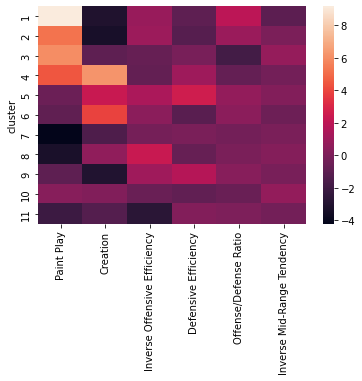

In [ ]:
import seaborn as sns
sns.heatmap(grouping_df.iloc[:, 0:6])

In [ ]:
for i in range(1,12):
  print(f"cluster: {i} {[j for j in pca_w_clst_df['Player'].loc[pca_w_clst_df['cluster']==i]]}")

cluster: 1 ['Jarrett Allen', 'Clint Capela', 'Willie Cauley-Stein', 'Willie Cauley-Stein', 'Daniel Gafford', 'Harry Giles', 'Rudy Gobert', 'Montrezl Harrell', 'Richaun Holmes', 'DeAndre Jordan', 'Mason Plumlee', 'Jakob Poeltl', 'Mitchell Robinson', 'Ivica Zubac']
cluster: 2 ['Khem Birch', 'Bismack Biyombo', 'Wendell Carter Jr.', 'Marquese Chriss', 'Derrick Favors', 'Bruno Fernando', 'Taj Gibson', 'Jaxson Hayes', 'John Henson', 'Rondae Hollis-Jefferson', 'Dwight Howard', 'Damian Jones', 'Skal Labissière', 'Alex Len', 'Alex Len', 'Ian Mahinmi', 'Thon Maker', 'Nerlens Noel', 'Dwight Powell', 'Tristan Thompson', 'Moritz Wagner', 'Zion Williamson', 'Cody Zeller']
cluster: 3 ['Steven Adams', 'Bam Adebayo', 'Deandre Ayton', 'Mo Bamba', 'Chris Boucher', 'Tony Bradley', 'Thomas Bryant', 'Brandon Clarke', 'John Collins', 'Gorgui Dieng', 'Gorgui Dieng', 'Andre Drummond', 'Andre Drummond', 'Serge Ibaka', 'Jonathan Isaac', 'Enes Kanter', 'Brook Lopez', 'JaVale McGee', 'Kristaps Porziņģis', 'Domanta

Cluster analysis, our interpretation of groupings:

1. Traditional Centers
2. Smaller, less traditional centers
3. Stretch 4/5s, Offensive bigs
4. Star Players
5. Secondary creators, strong defenders
6. Offensive creators, weak defenders
7. Small Backup Wings
8. Bench Creators/Spark plugs
9. Defensive specialist wings
10. Stretch 4's
11. Knock-down shooters

Now we will plot the first 5 PCA components against each other using a different color for each cluster of players.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


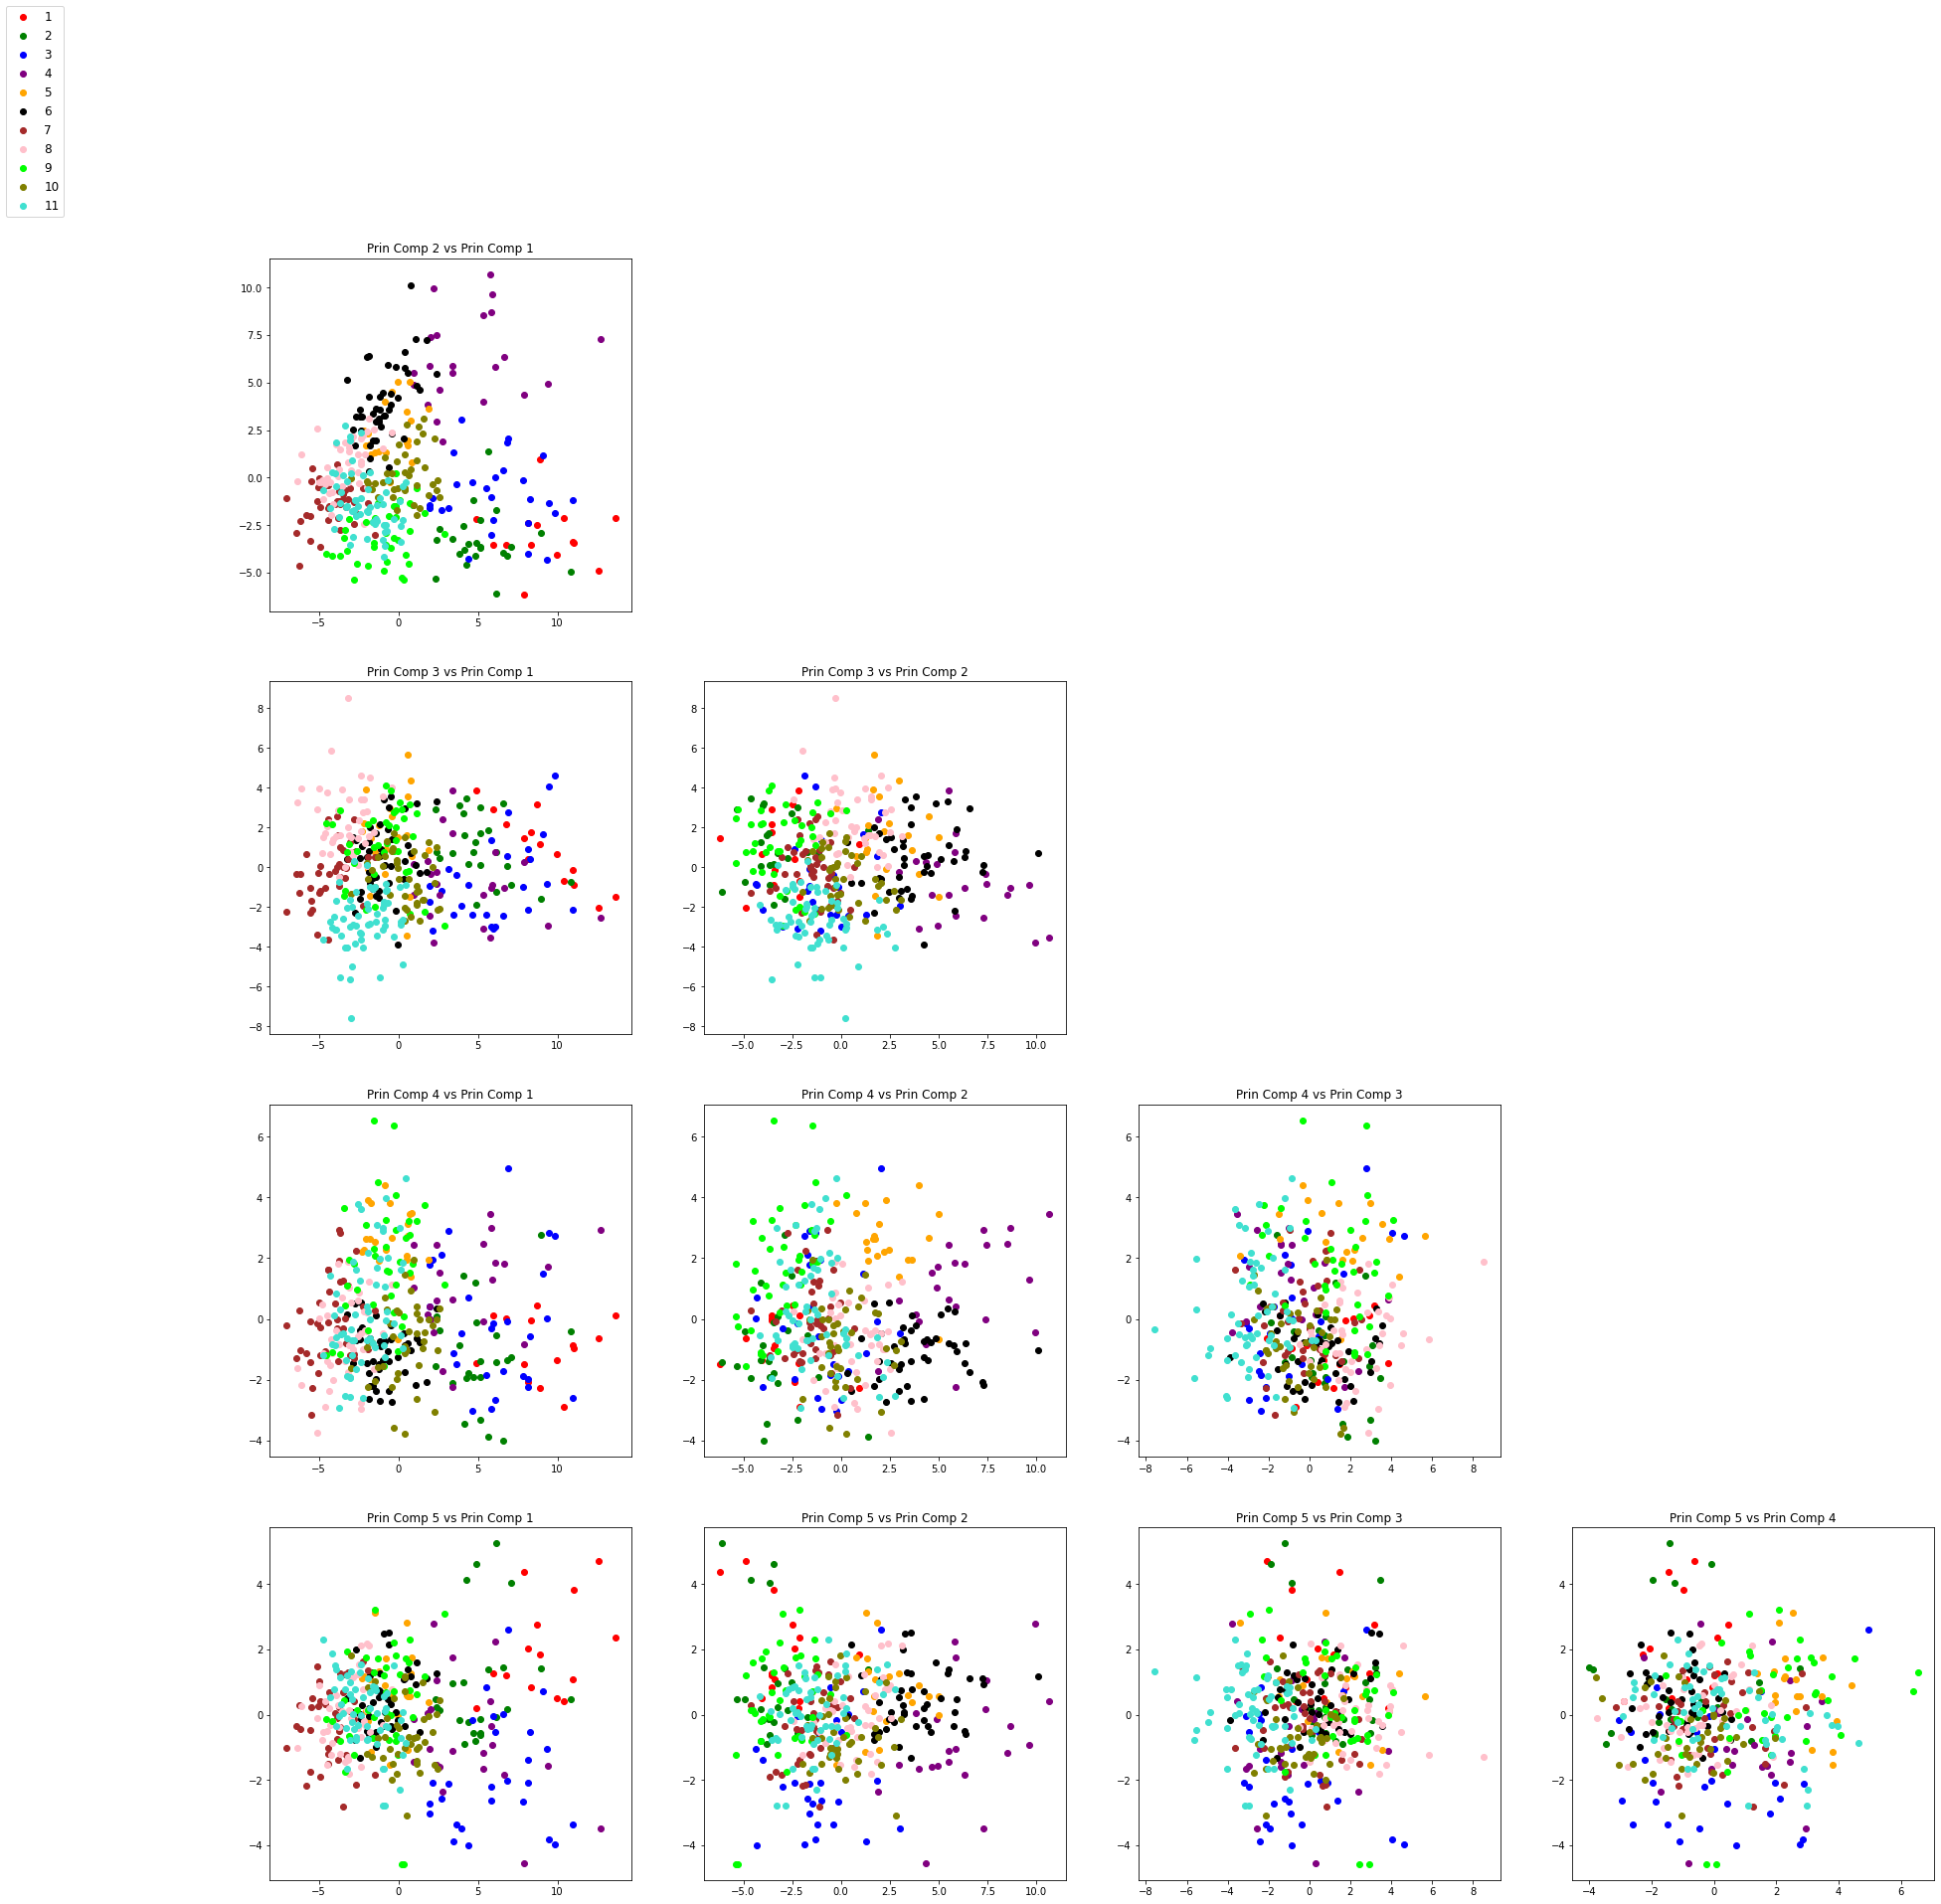

In [ ]:
X = pca_ri_df.drop(columns=["Pos"])
features = X.to_numpy()
target = clusters
target_names=[i for i in range(1,12)]
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black', 'brown', 'pink', 'lime', 'olive', 'turquoise']

fig = plt.figure(figsize=(30,30))
for i in range(5):
  for j in range(i+1,5):
    for t, c in zip(target_names,colors):
      indicesToKeep = clusters == t
      ax = fig.add_subplot(4,4,(j-1)*4+i+1)
      ax.scatter(pca_df.loc[indicesToKeep, pca_df.columns[i]]
               , pca_df.loc[indicesToKeep, pca_df.columns[j]]
               , c = c)
      ax.set_title(f"Prin Comp {j+1} vs Prin Comp {i+1}")
      
fig.legend(target_names, loc='upper left', fontsize='large')

Obviously this plot has much better separation between the clusters compared to the PCA plot from before.

# Add heights

We want to try adding a heights column to the dataset to see if this improves our models. Our expectation is that it will drastically improve the decision tree and random forest since these can better use individual features when classifying. We don't expect KNN or SVM to have significantly better results since a single feature doesn't have a lot of weight in these models.

In [ ]:
heights_df = pd.read_csv("https://raw.githubusercontent.com/Neel159/ProgrammingAssignment2/master/C%3A%5CUsers%5CNeel%5CDesktop%5C8.csv")
heights_df.describe(include="all")

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,WS/48,OBPM,DBPM,BPM,VORP,team,salary,position,season,height
count,412,412,412.000000,412,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412,4.120000e+02,412,412,412.000000
unique,412,9,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30,NaN,7,1,NaN
top,Steven Adams,SG,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Minnesota Timberwolves,NaN,SG,2019-2020,NaN
freq,1,105,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,NaN,108,412,NaN
mean,NaN,NaN,25.839806,NaN,48.065534,1118.689320,13.507282,0.547189,0.382626,0.249619,...,0.084146,-1.020874,-0.082524,-1.105583,0.564806,NaN,7.611415e+06,NaN,NaN,200.031165
std,NaN,NaN,4.205033,NaN,19.206854,675.858546,5.283928,0.077998,0.200797,0.135831,...,0.069776,2.871405,1.690977,3.439734,1.114994,NaN,8.924095e+06,NaN,NaN,8.262185
min,NaN,NaN,19.000000,NaN,2.000000,4.000000,-13.700000,0.000000,0.000000,0.000000,...,-0.327000,-15.700000,-22.100000,-22.400000,-1.700000,NaN,1.556470e+05,NaN,NaN,175.260000
25%,NaN,NaN,22.000000,NaN,36.000000,507.250000,10.075000,0.512000,0.269750,0.157750,...,0.049000,-2.800000,-0.900000,-2.800000,-0.100000,NaN,1.620564e+06,NaN,NaN,193.040000
50%,NaN,NaN,25.000000,NaN,55.000000,1129.500000,12.900000,0.552500,0.395000,0.223000,...,0.085500,-1.050000,-0.100000,-1.000000,0.200000,NaN,3.540278e+06,NaN,NaN,200.660000
75%,NaN,NaN,29.000000,NaN,63.000000,1687.000000,16.800000,0.590000,0.516250,0.321250,...,0.122250,0.625000,0.900000,0.900000,1.000000,NaN,9.940342e+06,NaN,NaN,205.740000


In [ ]:
all_df = heights_df.merge(shooting_df,on=["Player", 'Pos', 'Age', 'Tm', 'G', 'MP'],how='inner')

In [ ]:
all_df = all_df.merge(poss_df, on=["Player", 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG%'], how='inner')

In [ ]:
all_df.describe(include='all')

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
count,412,412,412.000000,412,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.00000,412.000000,412.000000,412.000000
unique,412,9,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Adams,SG,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,105,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.839806,NaN,48.065534,1118.689320,13.507282,0.547189,0.382626,0.249619,...,6.850485,9.073301,4.395388,1.519417,1.024272,2.679612,4.48568,20.068204,108.349515,110.730583
std,NaN,NaN,4.205033,NaN,19.206854,675.858546,5.283928,0.077998,0.200797,0.135831,...,2.855613,4.507676,2.626526,0.707734,0.927175,1.097718,1.59391,6.800396,13.289008,4.076249
min,NaN,NaN,19.000000,NaN,2.000000,4.000000,-13.700000,0.000000,0.000000,0.000000,...,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,97.000000
25%,NaN,NaN,22.000000,NaN,36.000000,507.250000,10.075000,0.512000,0.269750,0.157750,...,4.900000,5.900000,2.500000,1.100000,0.400000,1.900000,3.50000,15.600000,103.000000,108.000000
50%,NaN,NaN,25.000000,NaN,55.000000,1129.500000,12.900000,0.552500,0.395000,0.223000,...,6.400000,8.100000,3.500000,1.400000,0.700000,2.500000,4.20000,19.100000,109.000000,111.000000
75%,NaN,NaN,29.000000,NaN,63.000000,1687.000000,16.800000,0.590000,0.516250,0.321250,...,8.400000,10.925000,5.800000,1.900000,1.300000,3.300000,5.30000,24.000000,116.000000,113.250000


In [ ]:
all_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'team', 'salary',
       'position', 'season', 'height', 'FG%', 'Dist.', '2P Proportion',
       '0-3 Proportion', '3-10 Proportion', '10-16 Proportion',
       '16-3P Proportion', '3P Proportion', '2P FG%', '0-3 FG%', '3-10 FG%',
       '10-16 FG%', '16-3P FG%', '3P FG%', '2P Proportion Astd',
       '3P Proportion Astd', '%FGA Dunks', '# Dunks', '%3PA Corner 3s',
       '3P% Corner 3s', 'Att. Heaves', '# Heaves', 'GS', 'FG', 'FGA', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

In [ ]:
drop_features_1 = drop_features
drop_features_1.append('position')
drop_features_1.append('season')
drop_features_1.append('salary')
drop_features_1.append('team')

In [ ]:
w_ht_df = all_df.loc[all_df['MP']>500]
players = w_ht_df.Player
w_ht_df = w_ht_df.drop(columns=drop_features_1)
w_ht_df = w_ht_df.fillna(0)
std_w_ht_df = w_ht_df.copy()
# apply normalization techniques
for column in std_w_ht_df.columns:
  if std_w_ht_df[column].dtypes != object:
    std_w_ht_df[column] = (std_w_ht_df[column] - std_w_ht_df[column].mean()) / std_w_ht_df[column].std()

In [ ]:
std_w_ht_df = std_w_ht_df.drop(std_w_ht_df[std_w_ht_df.Pos.isin(["SF-PF","SF-SG","C-PF","PF-C"])].index)

In [ ]:
std_w_ht_df

,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,C,0.535136,1.270369,0.808093,-1.935916,1.365294,2.650800,1.461181,2.077983,-0.140006,...,2.512415,1.551331,-0.156182,-0.021779,0.995705,0.052458,-0.538547,-0.220599,1.212484,-1.223924
1,PF,1.951891,1.228012,0.693953,-1.875207,1.872225,1.098898,1.611731,1.584695,1.094431,...,0.987808,1.701351,1.034870,0.334709,0.995705,1.403952,-0.380911,0.282178,0.549579,-1.223924
2,C,0.677388,1.100941,0.180324,-0.964583,-0.083078,0.478137,0.424058,0.463584,-0.342005,...,0.479606,0.426182,-0.416725,-0.912999,1.549072,-0.623289,-0.538547,0.922076,0.439095,0.283563
3,SG,-1.558277,-1.186336,-1.683960,0.563244,-0.903823,-0.848035,-0.295237,-0.545415,0.746544,...,-0.854425,-0.323918,0.885989,-0.378267,-0.443050,1.500487,0.249632,-0.053006,-1.991557,0.534810
4,SG,-1.314142,-0.529803,0.903209,0.876904,-0.581962,-0.960900,-0.696705,-0.836903,-0.499116,...,-0.981476,-0.661462,-0.453945,-1.447730,-0.996417,-0.526754,-0.617365,0.038408,0.328610,1.037306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,SG,0.323680,0.190266,-0.143072,-0.403030,-0.066985,0.026674,-0.245054,-0.119393,0.735322,...,0.098454,-0.098888,1.072091,1.938904,-0.332376,-0.430218,-1.011454,-0.875732,0.991515,-0.218933
407,PF,0.364049,-0.254482,-0.770841,-0.099489,-1.056707,0.449920,0.139685,0.216940,-0.353227,...,0.479606,-0.023878,-0.416725,2.295392,-0.332376,0.438599,-0.065639,-0.190127,-1.107683,-0.721429
408,PG,1.380960,1.990438,0.636883,0.335588,1.582550,-0.848035,-0.629793,-0.769637,3.495974,...,-0.854425,-0.698967,2.858669,-0.200023,-0.885743,3.624263,-1.484362,2.719884,0.328610,1.539802
409,C,-0.116533,0.910335,0.275440,-1.172003,0.987108,2.255771,0.992803,1.517428,-0.353227,...,2.512415,0.988757,-0.491165,-0.021779,-0.111029,0.148993,0.801358,0.419299,0.549579,0.032315


# KNN with heights

k:2 , acc:0.5324675324675324
k:3 , acc:0.5974025974025974
k:4 , acc:0.6233766233766234
k:5 , acc:0.6493506493506493
k:6 , acc:0.6493506493506493
k:7 , acc:0.5844155844155844
k:8 , acc:0.6623376623376623
k:9 , acc:0.5584415584415584
k:10 , acc:0.5584415584415584
k:11 , acc:0.5584415584415584
k:12 , acc:0.5584415584415584
k:13 , acc:0.5454545454545454
k:14 , acc:0.5584415584415584
k:15 , acc:0.6103896103896104
k:16 , acc:0.5714285714285714
k:17 , acc:0.5844155844155844
k:18 , acc:0.5974025974025974
k:19 , acc:0.5454545454545454
k:20 , acc:0.5324675324675324
k:21 , acc:0.5454545454545454
k:22 , acc:0.5194805194805194
k:23 , acc:0.5194805194805194
k:24 , acc:0.5584415584415584
Best K: 8


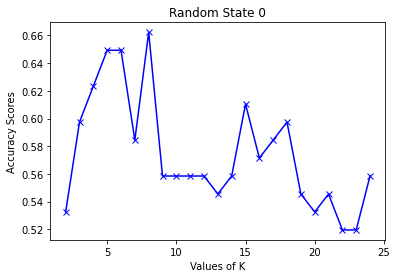

k:2 , acc:0.5324675324675324
k:3 , acc:0.4805194805194805
k:4 , acc:0.5064935064935064
k:5 , acc:0.45454545454545453
k:6 , acc:0.5064935064935064
k:7 , acc:0.5064935064935064
k:8 , acc:0.5714285714285714
k:9 , acc:0.5584415584415584
k:10 , acc:0.5584415584415584
k:11 , acc:0.5714285714285714
k:12 , acc:0.5844155844155844
k:13 , acc:0.5584415584415584
k:14 , acc:0.5714285714285714
k:15 , acc:0.5714285714285714
k:16 , acc:0.5454545454545454
k:17 , acc:0.5714285714285714
k:18 , acc:0.5844155844155844
k:19 , acc:0.5844155844155844
k:20 , acc:0.6103896103896104
k:21 , acc:0.5844155844155844
k:22 , acc:0.5194805194805194
k:23 , acc:0.5454545454545454
k:24 , acc:0.5844155844155844
Best K: 20


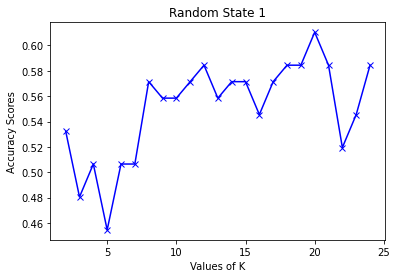

k:2 , acc:0.5454545454545454
k:3 , acc:0.5844155844155844
k:4 , acc:0.6363636363636364
k:5 , acc:0.6103896103896104
k:6 , acc:0.6363636363636364
k:7 , acc:0.6233766233766234
k:8 , acc:0.6493506493506493
k:9 , acc:0.6753246753246753
k:10 , acc:0.6623376623376623
k:11 , acc:0.6753246753246753
k:12 , acc:0.6623376623376623
k:13 , acc:0.6753246753246753
k:14 , acc:0.6233766233766234
k:15 , acc:0.6233766233766234
k:16 , acc:0.6493506493506493
k:17 , acc:0.5974025974025974
k:18 , acc:0.5844155844155844
k:19 , acc:0.6103896103896104
k:20 , acc:0.5974025974025974
k:21 , acc:0.6103896103896104
k:22 , acc:0.5714285714285714
k:23 , acc:0.6233766233766234
k:24 , acc:0.5974025974025974
Best K: 9


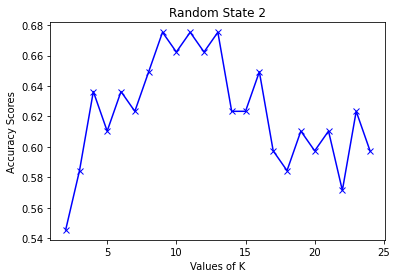

k:2 , acc:0.4675324675324675
k:3 , acc:0.5584415584415584
k:4 , acc:0.5584415584415584
k:5 , acc:0.6623376623376623
k:6 , acc:0.6233766233766234
k:7 , acc:0.6233766233766234
k:8 , acc:0.5844155844155844
k:9 , acc:0.5584415584415584
k:10 , acc:0.5584415584415584
k:11 , acc:0.5844155844155844
k:12 , acc:0.6363636363636364
k:13 , acc:0.6233766233766234
k:14 , acc:0.5844155844155844
k:15 , acc:0.5584415584415584
k:16 , acc:0.5844155844155844
k:17 , acc:0.6103896103896104
k:18 , acc:0.5974025974025974
k:19 , acc:0.5714285714285714
k:20 , acc:0.5844155844155844
k:21 , acc:0.5844155844155844
k:22 , acc:0.5844155844155844
k:23 , acc:0.6493506493506493
k:24 , acc:0.6363636363636364
Best K: 5


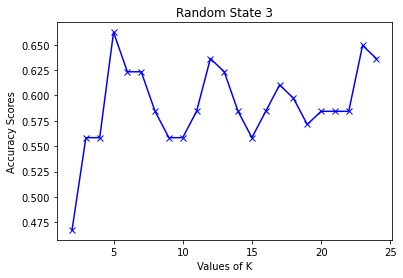

k:2 , acc:0.36363636363636365
k:3 , acc:0.4675324675324675
k:4 , acc:0.4675324675324675
k:5 , acc:0.4935064935064935
k:6 , acc:0.5584415584415584
k:7 , acc:0.5454545454545454
k:8 , acc:0.5324675324675324
k:9 , acc:0.4935064935064935
k:10 , acc:0.5064935064935064
k:11 , acc:0.4935064935064935
k:12 , acc:0.5194805194805194
k:13 , acc:0.5324675324675324
k:14 , acc:0.5584415584415584
k:15 , acc:0.5454545454545454
k:16 , acc:0.5844155844155844
k:17 , acc:0.5584415584415584
k:18 , acc:0.5454545454545454
k:19 , acc:0.5454545454545454
k:20 , acc:0.5584415584415584
k:21 , acc:0.4935064935064935
k:22 , acc:0.5324675324675324
k:23 , acc:0.5194805194805194
k:24 , acc:0.5454545454545454
Best K: 16


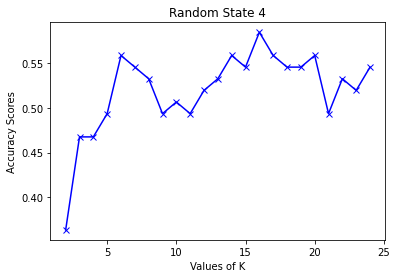

k:2 , acc:0.38961038961038963
k:3 , acc:0.5194805194805194
k:4 , acc:0.4935064935064935
k:5 , acc:0.5454545454545454
k:6 , acc:0.5844155844155844
k:7 , acc:0.5324675324675324
k:8 , acc:0.5064935064935064
k:9 , acc:0.5194805194805194
k:10 , acc:0.5324675324675324
k:11 , acc:0.4675324675324675
k:12 , acc:0.5714285714285714
k:13 , acc:0.5584415584415584
k:14 , acc:0.5844155844155844
k:15 , acc:0.5844155844155844
k:16 , acc:0.5584415584415584
k:17 , acc:0.5714285714285714
k:18 , acc:0.5584415584415584
k:19 , acc:0.5584415584415584
k:20 , acc:0.5454545454545454
k:21 , acc:0.5714285714285714
k:22 , acc:0.5324675324675324
k:23 , acc:0.5584415584415584
k:24 , acc:0.5324675324675324
Best K: 6


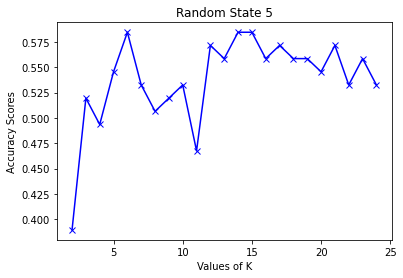

k:2 , acc:0.4805194805194805
k:3 , acc:0.5584415584415584
k:4 , acc:0.5324675324675324
k:5 , acc:0.4805194805194805
k:6 , acc:0.5454545454545454
k:7 , acc:0.5064935064935064
k:8 , acc:0.5324675324675324
k:9 , acc:0.5454545454545454
k:10 , acc:0.5454545454545454
k:11 , acc:0.5454545454545454
k:12 , acc:0.5584415584415584
k:13 , acc:0.5454545454545454
k:14 , acc:0.5324675324675324
k:15 , acc:0.5194805194805194
k:16 , acc:0.5064935064935064
k:17 , acc:0.5064935064935064
k:18 , acc:0.5064935064935064
k:19 , acc:0.5194805194805194
k:20 , acc:0.5454545454545454
k:21 , acc:0.5584415584415584
k:22 , acc:0.5454545454545454
k:23 , acc:0.5324675324675324
k:24 , acc:0.5454545454545454
Best K: 3


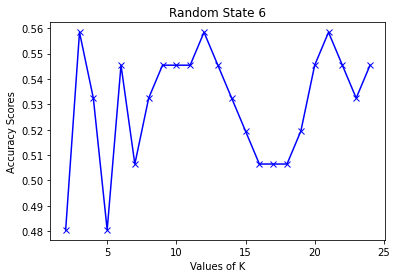

k:2 , acc:0.5844155844155844
k:3 , acc:0.5584415584415584
k:4 , acc:0.5194805194805194
k:5 , acc:0.5714285714285714
k:6 , acc:0.5974025974025974
k:7 , acc:0.5194805194805194
k:8 , acc:0.5584415584415584
k:9 , acc:0.5844155844155844
k:10 , acc:0.6493506493506493
k:11 , acc:0.6623376623376623
k:12 , acc:0.6753246753246753
k:13 , acc:0.6103896103896104
k:14 , acc:0.5974025974025974
k:15 , acc:0.5974025974025974
k:16 , acc:0.5974025974025974
k:17 , acc:0.6103896103896104
k:18 , acc:0.6233766233766234
k:19 , acc:0.5584415584415584
k:20 , acc:0.5974025974025974
k:21 , acc:0.5584415584415584
k:22 , acc:0.5844155844155844
k:23 , acc:0.5584415584415584
k:24 , acc:0.5844155844155844
Best K: 12


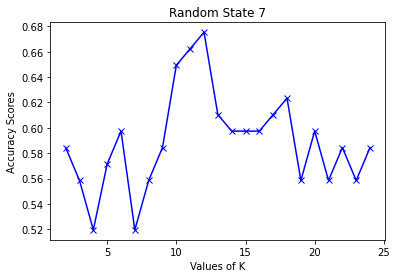

k:2 , acc:0.5194805194805194
k:3 , acc:0.5714285714285714
k:4 , acc:0.6103896103896104
k:5 , acc:0.5714285714285714
k:6 , acc:0.6103896103896104
k:7 , acc:0.5324675324675324
k:8 , acc:0.5714285714285714
k:9 , acc:0.5714285714285714
k:10 , acc:0.5714285714285714
k:11 , acc:0.5714285714285714
k:12 , acc:0.6493506493506493
k:13 , acc:0.5974025974025974
k:14 , acc:0.6363636363636364
k:15 , acc:0.6233766233766234
k:16 , acc:0.5844155844155844
k:17 , acc:0.5714285714285714
k:18 , acc:0.5584415584415584
k:19 , acc:0.5064935064935064
k:20 , acc:0.5584415584415584
k:21 , acc:0.5324675324675324
k:22 , acc:0.5454545454545454
k:23 , acc:0.5324675324675324
k:24 , acc:0.5584415584415584
Best K: 12


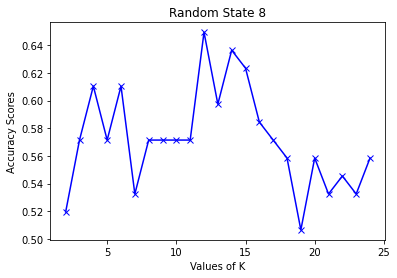

k:2 , acc:0.5324675324675324
k:3 , acc:0.5454545454545454
k:4 , acc:0.5714285714285714
k:5 , acc:0.6233766233766234
k:6 , acc:0.5974025974025974
k:7 , acc:0.5974025974025974
k:8 , acc:0.5454545454545454
k:9 , acc:0.5714285714285714
k:10 , acc:0.6233766233766234
k:11 , acc:0.5714285714285714
k:12 , acc:0.5454545454545454
k:13 , acc:0.5584415584415584
k:14 , acc:0.5584415584415584
k:15 , acc:0.6363636363636364
k:16 , acc:0.5974025974025974
k:17 , acc:0.5714285714285714
k:18 , acc:0.5714285714285714
k:19 , acc:0.6233766233766234
k:20 , acc:0.5844155844155844
k:21 , acc:0.5584415584415584
k:22 , acc:0.5974025974025974
k:23 , acc:0.6233766233766234
k:24 , acc:0.6233766233766234
Best K: 15


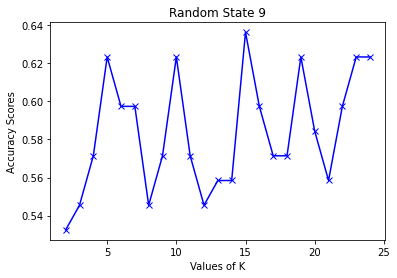

average scores: [(2, 0.49480519480519475), (3, 0.5441558441558442), (4, 0.5519480519480519), (5, 0.5662337662337662), (6, 0.5909090909090909), (7, 0.5571428571428572), (8, 0.5714285714285714), (9, 0.5636363636363636), (10, 0.5766233766233766), (11, 0.57012987012987), (12, 0.5961038961038959), (13, 0.5805194805194805), (14, 0.5805194805194805), (15, 0.587012987012987), (16, 0.577922077922078), (17, 0.5753246753246752), (18, 0.5727272727272726), (19, 0.5623376623376624), (20, 0.5714285714285714), (21, 0.5597402597402598), (22, 0.5532467532467532), (23, 0.5662337662337662), (24, 0.5766233766233766)]


In [ ]:
import matplotlib.pyplot as plt

X = std_w_ht_df.drop(columns=["Pos"])
y = std_w_ht_df.Pos

K = range(2,25)

avg_scores = np.zeros(23)


for j in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=j)
  scores = []
  best = 0
  max = 0
  for x in K:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)  
    y_pred = knn.predict(X_test)
    ac = metrics.accuracy_score(y_test, y_pred)
    print(f'k:{x} , acc:{ac}')
    scores.append(ac)
    if (ac>max):
      best = x
      max = ac
  avg_scores = avg_scores + scores
  
  print(f'Best K: {best}')
  plt.plot(K, scores, 'bx-') 
  plt.xlabel('Values of K') 
  plt.ylabel('Accuracy Scores') 
  plt.title(f'Random State {j}')
  plt.show() 
print(f'average scores: {[i for i in enumerate(avg_scores/10, 2)]}') # print average accuracy for each k

Best K is consistently around 12. The model performs slightly better with the heights data.

In [ ]:
X = std_w_ht_df.drop(columns=["Pos"])
y = std_w_ht_df.Pos
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=8, random_state=0)
scores = cross_val_score(dtc, X, y, cv=5)
scores

array([0.5483871 , 0.64516129, 0.59016393, 0.6557377 , 0.62295082])

Decision tree performs significantly better with the heights data.

Let's get a visual representation of what is going on here.

In [ ]:
dtc.fit(X, y)

DecisionTreeClassifier(min_samples_split=8, random_state=0)

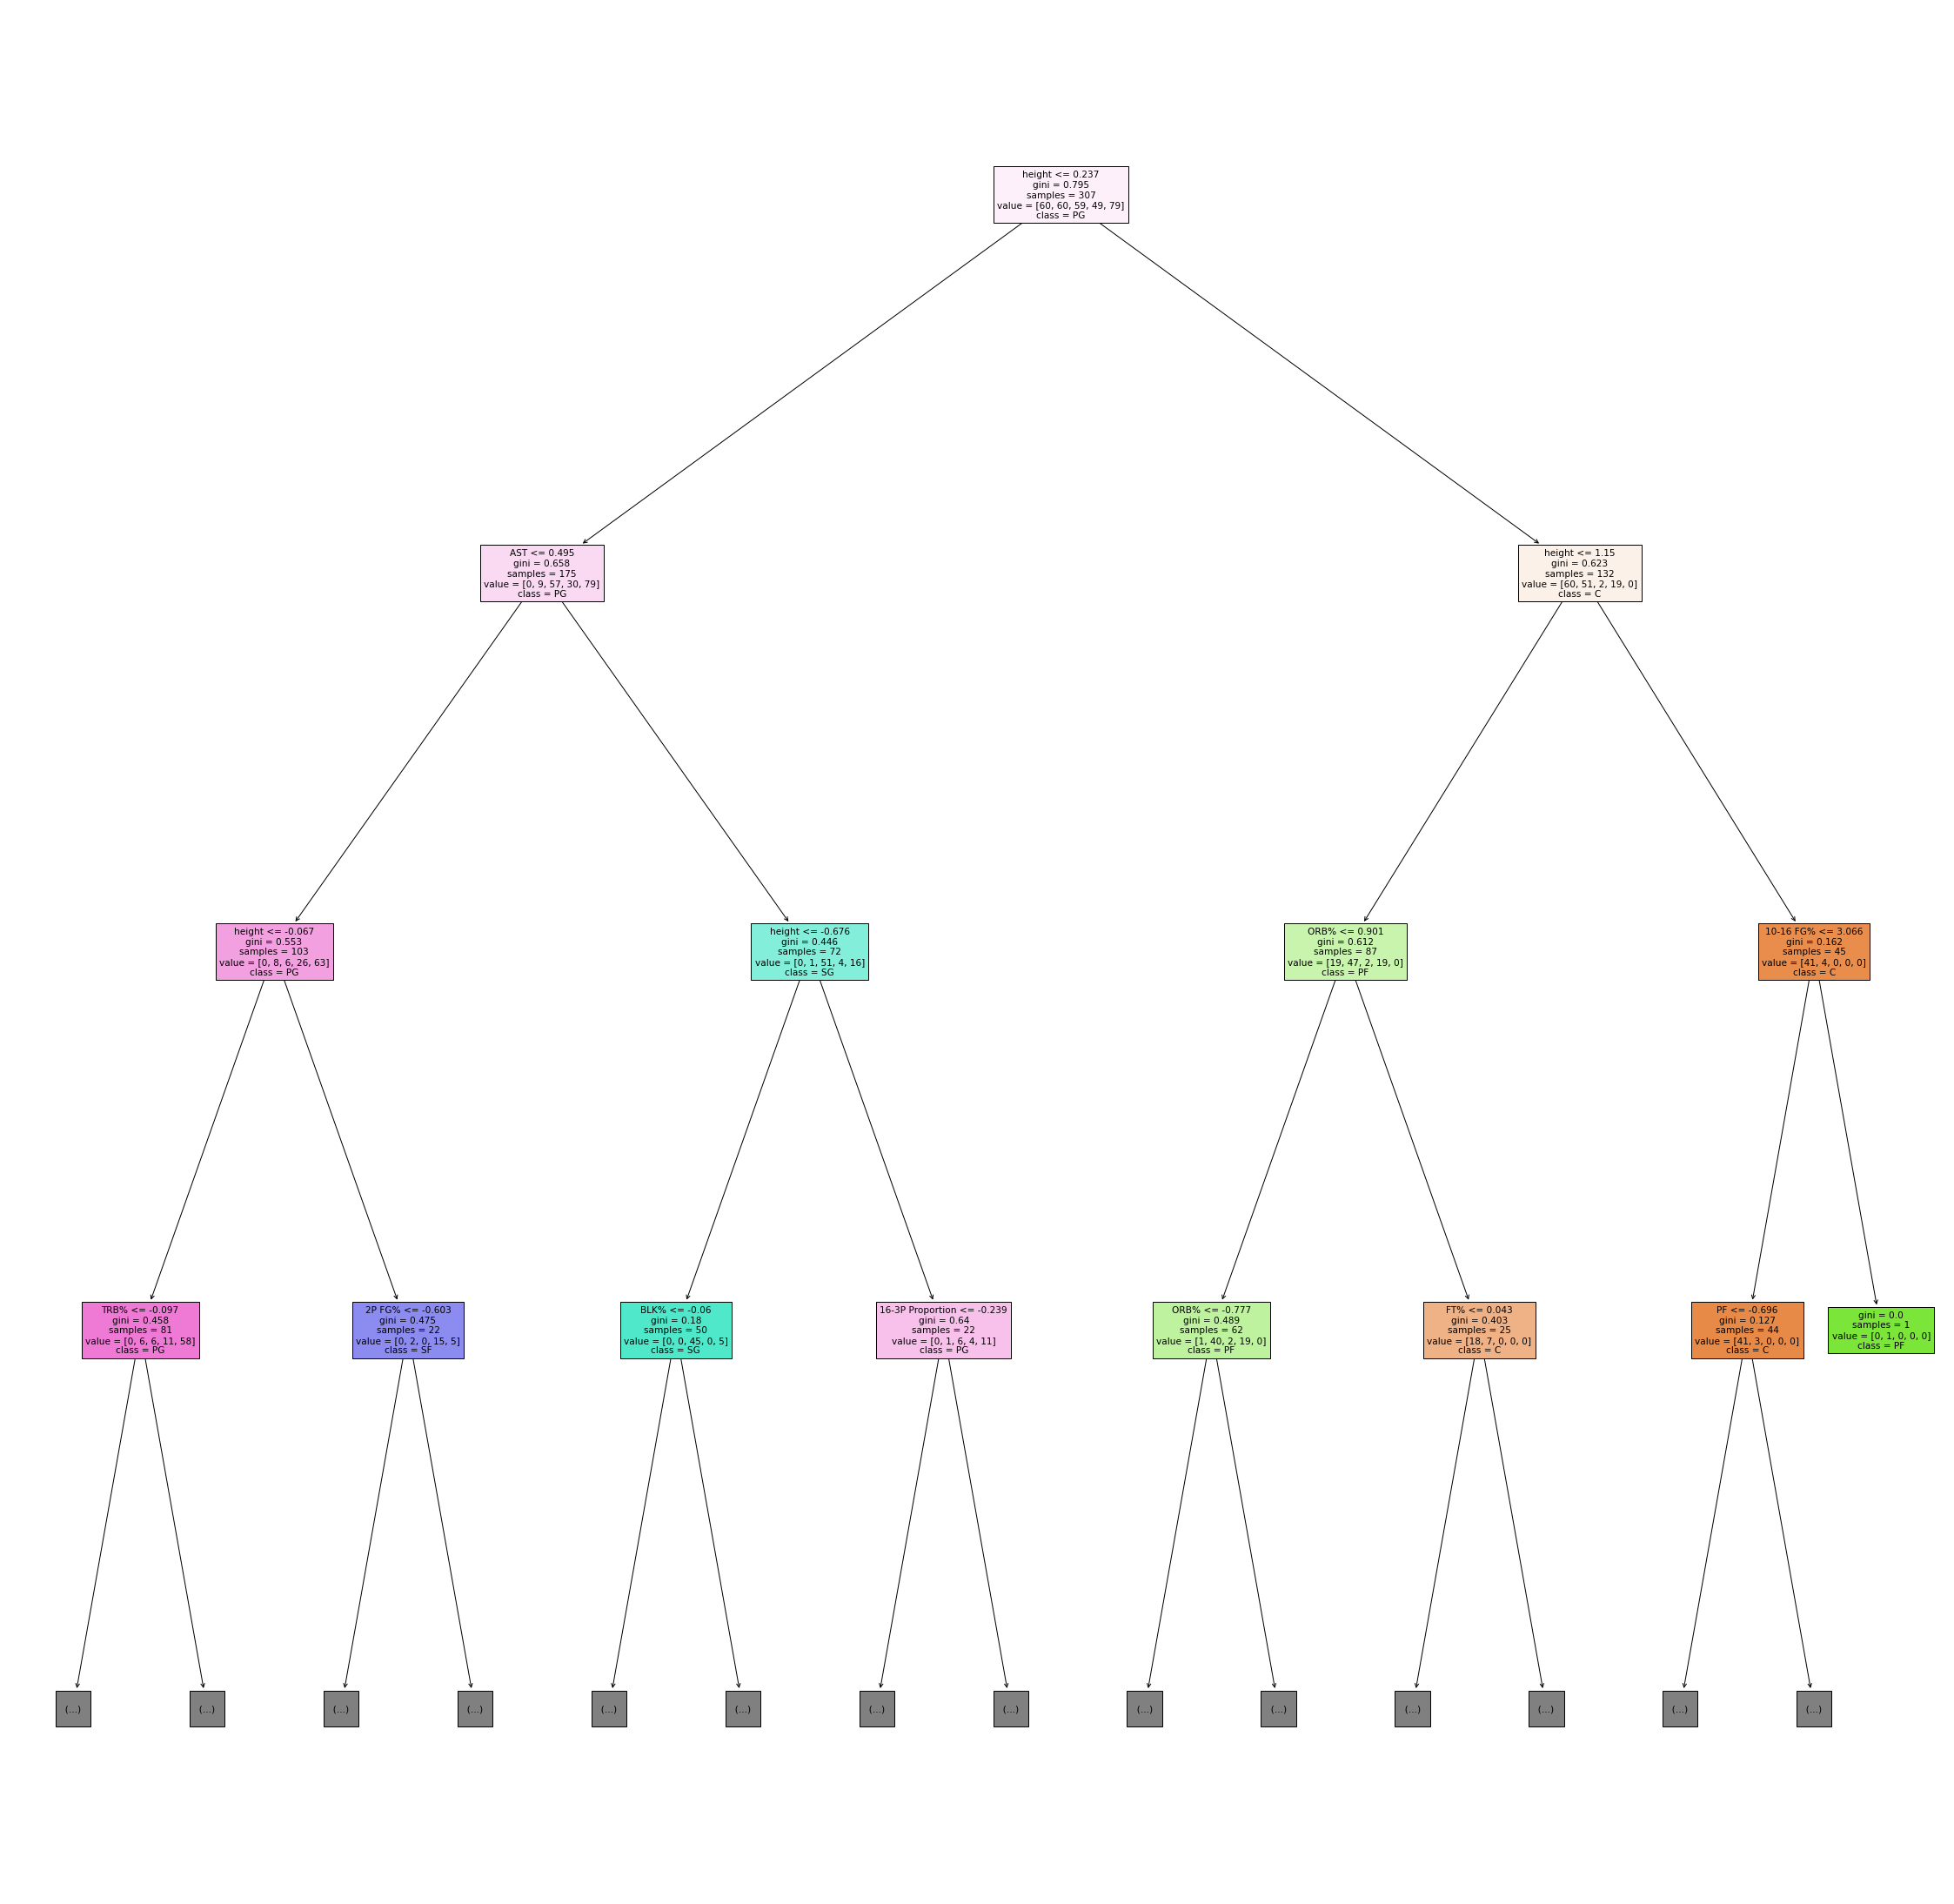

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True,
                   max_depth=3)

If zoom in on the figure, we can see that the decision tree is using height to split to data in the first and second layers of nodes. This means that height is one of the most important features in the tree.

In [ ]:
for i in range(2,20,2):
  rfc = RandomForestClassifier(random_state=3, min_samples_split=i)
  scores = cross_val_score(rfc, X, y, cv=5)
  print(f"min_samples{i}:")
  print(scores, scores.sum()/5)

min_samples2:
[0.59677419 0.74193548 0.73770492 0.68852459 0.63934426] 0.6808566895822317
min_samples4:
[0.62903226 0.75806452 0.75409836 0.70491803 0.62295082] 0.6938127974616606
min_samples6:
[0.61290323 0.75806452 0.7704918  0.6557377  0.63934426] 0.6873083024854575
min_samples8:
[0.56451613 0.75806452 0.78688525 0.67213115 0.62295082] 0.6809095716552089
min_samples10:
[0.59677419 0.79032258 0.75409836 0.67213115 0.62295082] 0.6872554204124801
min_samples12:
[0.59677419 0.77419355 0.73770492 0.63934426 0.63934426] 0.677472236911687
min_samples14:
[0.59677419 0.79032258 0.70491803 0.6557377  0.63934426] 0.6774193548387097
min_samples16:
[0.58064516 0.72580645 0.70491803 0.62295082 0.67213115] 0.6612903225806452
min_samples18:
[0.59677419 0.74193548 0.67213115 0.63934426 0.63934426] 0.6579058699101006


Minimum split of about 4 looks like it gives the best results. Let's use this across 10 random states for splits.

In [ ]:
for i in range(1, 11):
  rfc = RandomForestClassifier(random_state=3, min_samples_split=4)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=i)
  rfc.fit(X_train,y_train)
  y_pred = rfc.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  pre, rec, f, s = metrics.precision_recall_fscore_support(y_test, y_pred)
  print(f"split {i}:")
  print(f'accuracy= {score}')
  print(f'precision= {pre}')
  print(f'recall= {rec}')

split 1:
accuracy= 0.6753246753246753
precision= [0.84615385 0.47368421 0.875      0.53846154 0.6875    ]
recall= [0.57894737 0.69230769 0.93333333 0.53846154 0.64705882]
split 2:
accuracy= 0.6233766233766234
precision= [0.65217391 0.5        0.8        0.25       0.68421053]
recall= [0.83333333 0.35294118 0.8        0.22222222 0.72222222]
split 3:
accuracy= 0.6623376623376623
precision= [0.84615385 0.55555556 0.6875     0.14285714 0.7826087 ]
recall= [0.73333333 0.83333333 0.78571429 0.09090909 0.72      ]
split 4:
accuracy= 0.5194805194805194
precision= [0.54545455 0.3125     0.625      0.4        0.78571429]
recall= [0.42857143 0.29411765 0.83333333 0.61538462 0.52380952]
split 5:
accuracy= 0.7012987012987013
precision= [0.71428571 0.6        0.77777778 0.5        0.81481481]
recall= [0.83333333 0.47368421 1.         0.46153846 0.84615385]
split 6:
accuracy= 0.6233766233766234
precision= [0.85714286 0.58333333 0.6875     0.14285714 0.60714286]
recall= [0.8        0.5        0.733333

Crosstab for the last split.

In [ ]:
pd.crosstab(y_test, y_pred, margins=True)

col_0,C,PF,PG,SF,SG,All
Pos,,,,,,
C,7,3,0,0,0,10
PF,4,10,0,2,2,18
PG,0,0,10,0,2,12
SF,0,2,3,3,7,15
SG,0,0,4,0,18,22
All,11,15,17,5,29,77


Random forest also gives much better results when we add in the heights data. 

In [ ]:
clf = svm.SVC()
scores = cross_val_score(clf, X, y, cv=5)

print(scores, scores.sum()/5)

[0.59677419 0.66129032 0.67213115 0.62295082 0.62295082] 0.6352194606028556


It looks like SVM gives similar results with the heights data.